In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import norm


In [4]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 25)
    plt.show()

In [5]:
def self_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    imp_mat = np.tril(np.array(imp_mat)).flatten()
    imp_mat = imp_mat[np.where(imp_mat != 0.0)]
    return imp_mat.tolist()

def out_comp(imp_mat):
    imp_mat = np.mat(imp_mat).flatten()
    #imp_mat = np.tril(np.array(imp_mat)).flatten()
    #imp_mat = imp_mat[np.where(imp_mat != 0.0)]
    return imp_mat.tolist()[0]


In [6]:
def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
    return (np.sqrt(branch_dist))

In [7]:
def jaccard_distance(dict1,dict2):
    onion = len(set(dict1).union(set(dict2)))
    #entry = len(set(dict1).intersection(set(dict2)))
    #print((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    return ((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

def cosine_pseudodistance(dict1,dict2):
    dict1list = []; dict2list = []
    for n in list(set(dict1).intersection(set(dict2))): 
        dict1list.append(dict1[n]);dict2list.append(dict2[n])
    return cosine_similarity([dict1list], [dict2list])[0][0]



def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

In [32]:


def PCA_slope(x,y):
    xaxis = [];yaxis = []
    for n in (list(set(x).intersection(set(y)))):
        xaxis.append(x[n]);yaxis.append(y[n])
    #name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    #name1,name2 = name1[18:-7],name2[18:-7]
    
    points = np.array([xaxis,yaxis]).T
    pca = PCA(n_components=2)
    
    pca.fit(points)
    eigenvectors = pca.components_; eigenvalues = pca.explained_variance_;
    
    
    #print(pca.components_,pca.explained_variance_,'\n')
    #print(eigenvectors[0][1]/eigenvectors[0][0] )
    return eigenvectors[0][1]/eigenvectors[0][0]
    #np.vstack([points, np.array(yaxis)])
    
    #print(len(list(set(lis[x]).intersection(set(lis[y])))))



In [8]:
def variable_nodes(dict1,root_node):
    tip = dict()
    for n in [x for x in dict1 if re.search(root_node, x)]: tip[n] = dict1[n]
    return tip

In [304]:
def node_comparison_trimmer(dict0,root_node):
    dict1 = dict(dict0)
    tip = dict()
    if root_node == 'EMS':
        root_node = 'Q'
        for n in [x for x in dict1 if re.search('E', x) or re.search('MS', x)]:
            if n == 'EMS':
                dict1['Q'] = dict1[n]
            if n[0] == 'E':
                dict1['Qp'+n[1:]] = dict1[n]
            elif n == 'MS' : dict1['Qp'] = dict1['MS']
            else:
                dict1['Qa'+n[2:]] = dict1[n]
    elif root_node == 'P2':
        root_node = 'Q'
        try:
            dict1['P3'] = dict1['Ql']
        except:
            pass
        for n in [x for x in dict1 if re.search('C', x) or re.search('D', x)]:
            if n[0] == 'C':
                dict1['Qr'+n[1:]] = dict1[n]
            else:
                dict1['Qrr'+n[1:]] = dict1[n]
    elif root_node == 'P3':
        root_node = 'Q'
        try:
            dict1['P4'] = dict1['Ql']
        except:
            pass
        for n in [x for x in dict1 if re.search('D', x)]:
            dict1['Qr'+n[1:]] = dict1[n]
    for n in [x for x in dict1 if re.search(root_node, x)]: 
        m = n.replace('r', "p").replace('v', "p")
        m = m.replace('d', "a").replace('l', "a")
        m = m[len(root_node):]
        tip[m] = dict1[n]
    return tip

In [10]:
with open('fullnameset.pickle', 'rb') as handle:
    fullnameset = pickle.load(handle)
with open('inlier_ref.pickle', 'rb') as handle:
    inlier_ref = pickle.load(handle)
with open('RNAi_name_array.pickle', 'rb') as handle:
    RNAi_name_array = pickle.load(handle)
with open('root_cells_comp.pickle', 'rb') as handle:
    root_cells_comp = pickle.load(handle)
with open('RNAi_size_assignments.pickle', 'rb') as handle:
    RNAi_size_assignments = pickle.load(handle)
with open('fulldictset.pickle', 'rb') as handle:
    fulldictset = pickle.load(handle)


In [11]:
directory = os.getcwd()
sorted(os.listdir(directory))

['.ipynb_checkpoints',
 '1368-embryos.csv',
 '1368-embryos_edited.csv',
 'Fate_trans.csv',
 'Fate_trans_old.csv',
 'RNAi_name_array.pickle',
 'RNAi_size_assignments.pickle',
 'Undefined_trans.csv',
 'Untitled.ipynb',
 '_204-developmental-genes.csv',
 'agaeha.csv',
 'comp_prg_1.ipynb',
 'full_b_mat_ABa_x_ABa.txt',
 'full_b_mat_ABa_x_ABal.txt',
 'full_b_mat_ABa_x_ABala.txt',
 'full_b_mat_ABa_x_ABalp.txt',
 'full_b_mat_ABa_x_ABar.txt',
 'full_b_mat_ABa_x_ABara.txt',
 'full_b_mat_ABa_x_ABarp.txt',
 'full_b_mat_ABa_x_ABp.txt',
 'full_b_mat_ABa_x_ABpl.txt',
 'full_b_mat_ABa_x_ABpla.txt',
 'full_b_mat_ABa_x_ABplp.txt',
 'full_b_mat_ABa_x_ABpr.txt',
 'full_b_mat_ABa_x_ABpra.txt',
 'full_b_mat_ABa_x_ABprp.txt',
 'full_b_mat_ABa_x_C.txt',
 'full_b_mat_ABa_x_D.txt',
 'full_b_mat_ABa_x_E.txt',
 'full_b_mat_ABa_x_EMS.txt',
 'full_b_mat_ABa_x_MS.txt',
 'full_b_mat_ABa_x_P2.txt',
 'full_b_mat_ABa_x_P3.txt',
 'full_b_mat_ABal_x_ABa.txt',
 'full_b_mat_ABal_x_ABal.txt',
 'full_b_mat_ABal_x_ABala.txt',
 

In [12]:
qf = pd.read_csv('Undefined_trans.csv', header=None)
useit = list(qf.iloc[0])[0]

qf = pd.read_csv('Undefined_trans.csv')
Undefined_trans = dict()
for n in range(0,len(qf)):
    cells_of_interest = set(qf.iloc[n,1:])
    try:
        cells_of_interest.remove(useit)
    except:
        pass
    protein_tag = (qf.iloc[n,0].replace("'", "")).replace(",", "")
    
    cells_of_interest = sorted(list(cells_of_interest))
    print(protein_tag, cells_of_interest )
    Undefined_trans[protein_tag] = cells_of_interest
    embryos_of_interest = np.where(RNAi_name_array == protein_tag)[0]

ABI-1 ['ABpra']
AMA-1 ['ABalp', 'ABar', 'ABp', 'C', 'EMS']
AOS-1 ['ABala', 'ABpla']
APR-1 ['ABalp', 'ABar', 'ABplp']
APX-1 []
ARX-2 ['ABpl']
ATX-2 ['ABalp', 'C']
BUB-1 ['ABal', 'ABara', 'ABprp', 'C']
C01A2.5 ['ABalp', 'ABar', 'ABprp', 'E']
C01F1.1 []
C02B10.5 ['ABara', 'ABp']
C06A5.1 ['ABalp', 'ABar', 'ABpl', 'ABprp', 'EMS']
C07A9.2 ['ABarp', 'ABplp', 'C', 'MS']
C08B11.3 ['ABpla']
C49H3.8 ['ABalp', 'ABara', 'ABplp', 'ABpr', 'EMS']
C50F2.3 ['ABalp', 'ABar', 'ABp', 'C']
C55A6.9 ['E']
CACN-1 ['AB', 'C', 'EMS']
CAMT-1 ['ABal', 'ABpl', 'ABprp', 'MS']
CBP-1 ['AB', 'C', 'EMS']
CDC-25.1 []
CDC-37 ['ABar', 'ABarp', 'ABp', 'ABplp', 'C']
CDK-7 ['AB', 'C', 'EMS']
CDK-9 ['ABalp', 'ABar', 'ABp']
CDT-1 ['ABarp', 'ABp']
CEH-24 ['ABpra', 'ABprp', 'C', 'EMS']
CHAF-2 ['ABalp', 'ABara', 'ABp', 'C']
CHC-1 ['ABara', 'ABprp']
CHK-1 ['ABara', 'ABpla', 'ABprp', 'EMS']
CIR-1 ['ABa', 'ABplp', 'ABpr', 'EMS']
CLPF-1 ['AB', 'C', 'EMS']
CLS-2 ['C', 'MS']
CMD-1 ['ABara', 'C', 'E']
CPL-1 ['ABalp', 'ABpl', 'ABprp']
CPS

In [13]:
def suffix_changer(lis,elm):
    lis2 = list(lis)
    #print(elm, len(elm))
    if 'AB' in elm:
        for n in root_cells_comp:
            if n[0:len(elm)-1] == elm[0:-1] and len(n) == len(elm) and n != elm:
                print(n)
    #print(root_cells_comp)
    
#print(root_cells_comp)

In [14]:
undefined_search_gene = 'CPL-1'
undefined_search_tag = Undefined_trans[undefined_search_gene][2]
complementary_undefined_search_tag = str(undefined_search_tag)
suffix_changer(Undefined_trans[undefined_search_gene], undefined_search_tag)
undefined_search_tag = '_'+undefined_search_tag+'_x_'+undefined_search_tag+'.txt'
#print(undefined_search_tag)
#print(undefined_search_tag)
for n in sorted(os.listdir(directory)):
    if undefined_search_tag in n:
        undefined_search_url = n
        #print(n)
    #if undefined_search_tag in n:
    #    undefined_search_url = n
print(undefined_search_url)
gene_list = np.where(RNAi_name_array == undefined_search_gene)[0].tolist() #.tolist()

ABpra
full_b_mat_ABprp_x_ABprp.txt


In [15]:
#plot_2_examples(['hot_r'],b_mat)

7 7


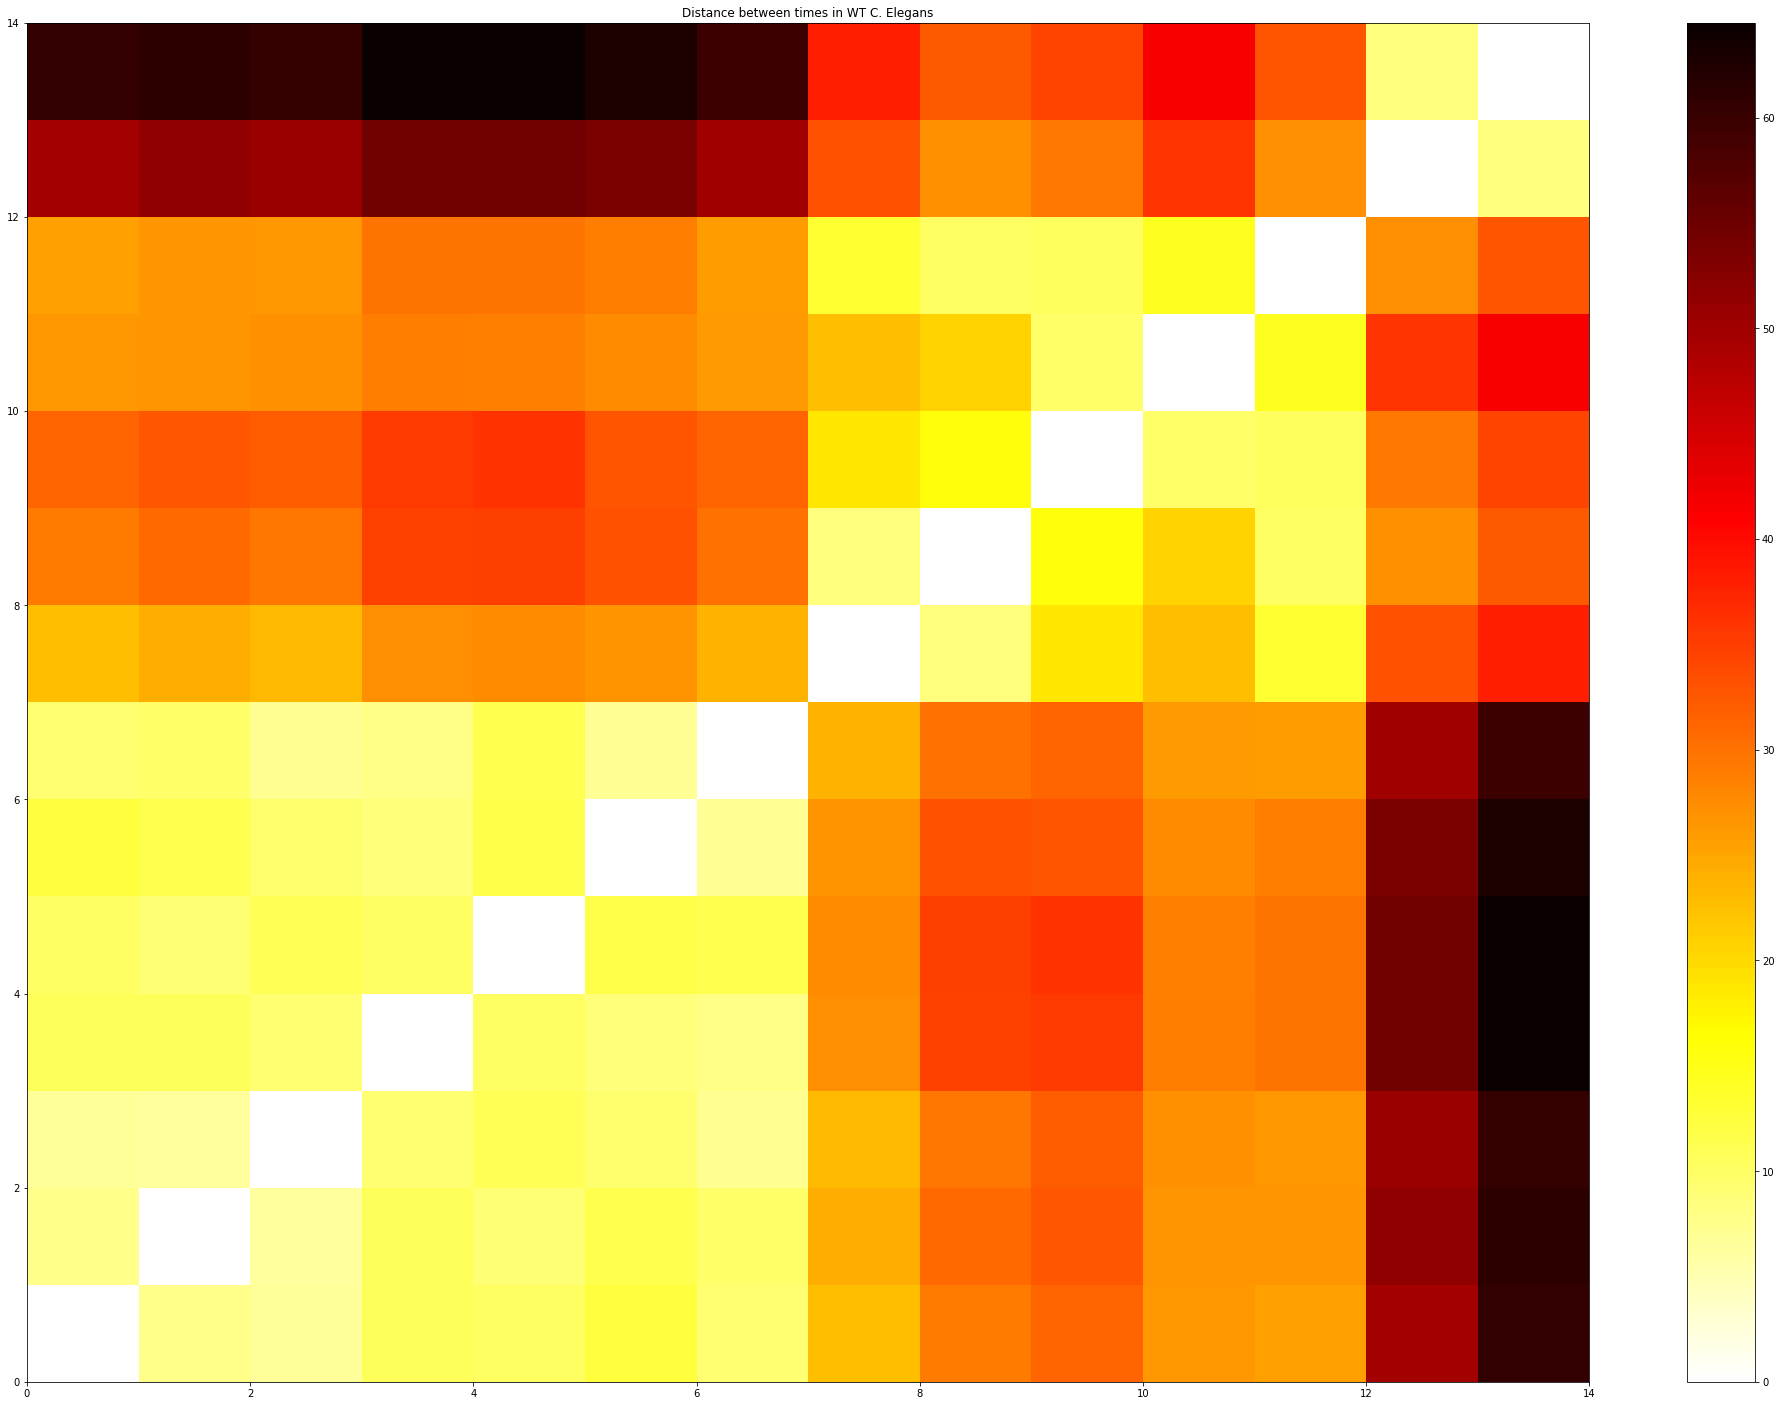

In [16]:
b_mat = np.loadtxt(undefined_search_url)
inliers = np.array(inlier_ref)[sorted(random.sample(range(0, len(inlier_ref)), len(gene_list)))].tolist()
index_list = inliers + gene_list
print(len(inliers),len(gene_list))
plot_2_examples(['hot_r'],b_mat[index_list].T[index_list])

In [17]:
#plot_2_examples(['hot_r'],b_mat[inliers].T[inliers])


(array([2., 2., 2., 1., 4., 1., 2., 3., 3., 1.]),
 array([ 6.32455532,  6.93306715,  7.54157899,  8.15009082,  8.75860265,
         9.36711448,  9.97562632, 10.58413815, 11.19264998, 11.80116181,
        12.40967365]),
 <BarContainer object of 10 artists>)

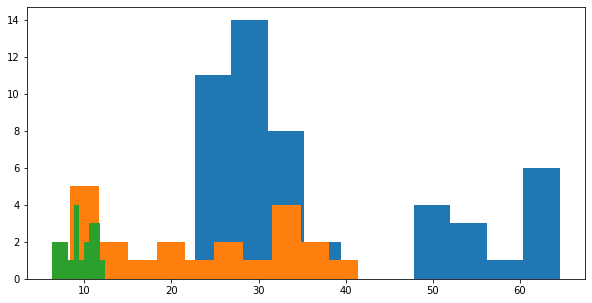

In [18]:
#self_comp(b_mat[inliers].T[inliers])
#out_comp(b_mat[inliers].T[gene_list])
#self_comp(b_mat[gene_list].T[gene_list])

plt.hist(out_comp(b_mat[inliers].T[gene_list]), bins = 10)
plt.hist(self_comp(b_mat[gene_list].T[gene_list]), bins = 10)
plt.hist(self_comp(b_mat[inliers].T[inliers]), bins = 10)

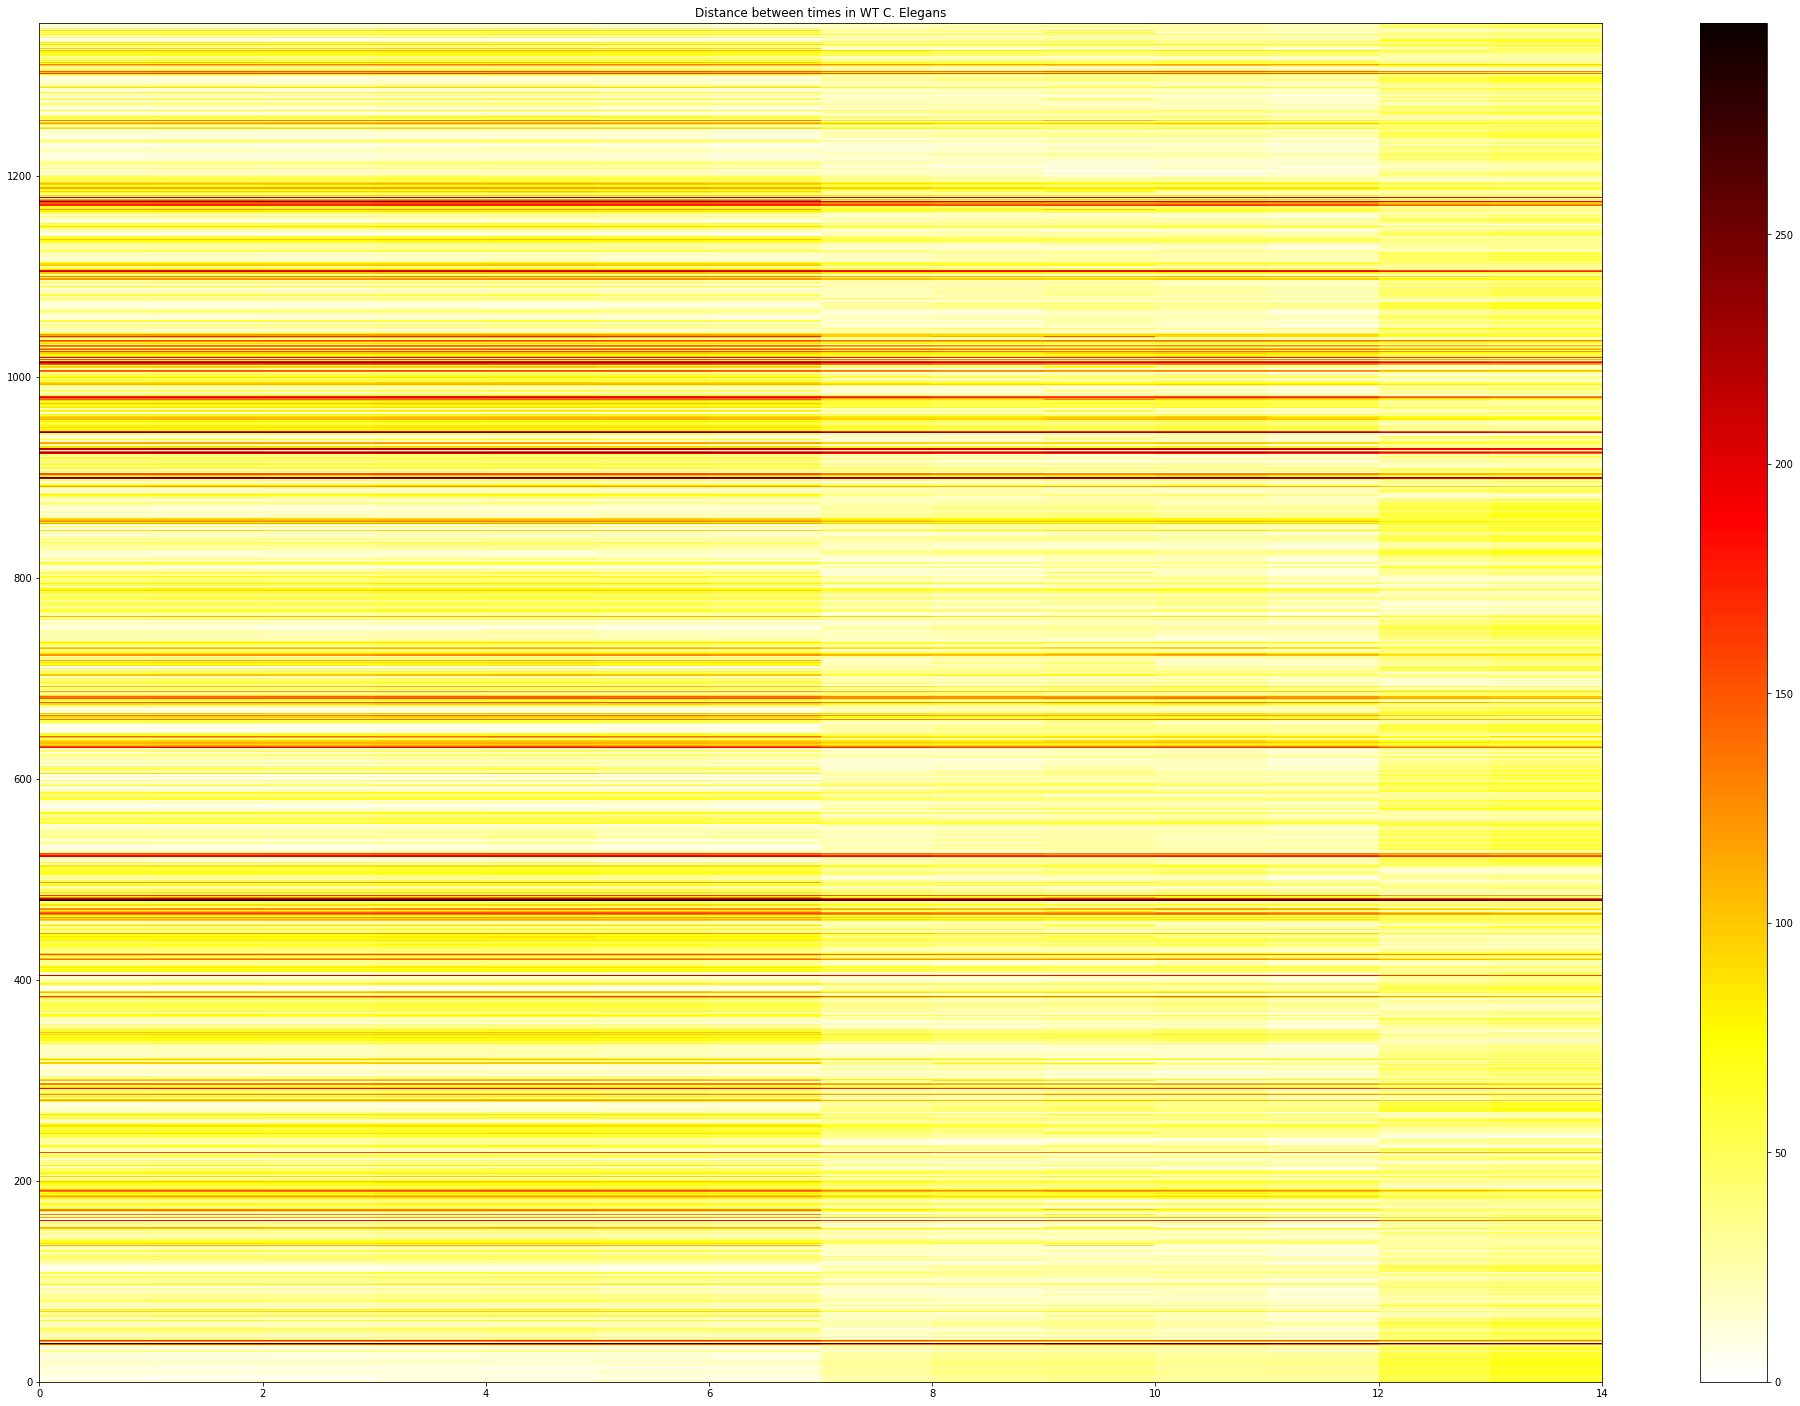

In [19]:
#undefined_search_gene = 'CLS-2'
#gene_list = np.where(RNAi_name_array == undefined_search_gene)[0].tolist()
#inliers = np.array(inlier_ref)[sorted(random.sample(range(0, len(inlier_ref)), len(gene_list)))].tolist()
#index_list = inliers + gene_list
#plot_2_examples(['hot_r'],b_mat[index_list].T[index_list])
plot_2_examples(['hot_r'],b_mat[index_list].T)

In [20]:
qf = pd.read_csv('Undefined_trans.csv', header=None)

In [21]:
qf = pd.read_csv('Fate_trans.csv', header=None)
qf = qf.fillna('0')
Fate_transforms = pd.DataFrame(qf).to_numpy()

In [22]:
Fate_transforms_gene_index = Fate_transforms[:,0].tolist()
Fate_transforms_gene_index = np.array([each_string.upper() for each_string in Fate_transforms_gene_index])
Fate_transforms_gene_index

array(['GENE', 'APX-1', 'ATX-2', 'C49H3.8', 'CAMT-1', 'CDC-25.1',
       'CDC-37', 'CEH-24', 'CHAF-2', 'CHK-1', 'CLS-2', 'CPL-1', 'CSN-4',
       'CUL-1', 'CUL-2', 'CUL-3', 'DIV-1', 'DLC-1', 'DLI-1', 'DRH-3',
       'F23F1.5', 'F35F11.1', 'F44B9.8', 'GEI-17', 'GLD-2', 'GLP-1',
       'GPB-1', 'GSK-3', 'HDA-1', 'HMP-2', 'LAG-1', 'LET-502', 'LIN-23',
       'MBK-2', 'MEI-1', 'MEX-3', 'MEX-5', 'MOM-2', 'MOM-5', 'NMY-2',
       'NPP-4', 'NUD-1', 'OMA-1/2', 'PAD-1', 'PAR-2', 'PAR-3', 'PAR-6',
       'PIE-1', 'PKC-3', 'POP-1', 'POS-1', 'PPFR-4', 'PUF-3', 'RAB-5',
       'RAB-7', 'RAD-51', 'RAN-4', 'RBA-1', 'RFC-3', 'RGA-3', 'RUVB-1',
       'SEL-8', 'SKN-1', 'SKR-1/2', 'SRC-1', 'SUF-1', 'T11G6.8',
       'TAG-256', 'TAT-5', 'TSR-1', 'UBA-1', 'UBC-12', 'VPS-4', 'WWP-1',
       'Y53F4B.22', 'ZYG-11', 'ZYG-12'], dtype='<U9')

In [23]:
protein_tag = 'CUL-1'
#protein_tag = 'SKN-1'
#protein_tag = 'TAT-5'
#protein_tag = 'CEH-24'

In [1037]:
#b_mat = np.loadtxt('full_b_mat_ABa_x_ABal.txt').T;b_mat[0,10];

In [1038]:
#branch_distance(node_comparison_trimmer(fulldictset[0], 'ABa'), node_comparison_trimmer(fulldictset[10], 'ABal'))

In [1039]:
Departing_cells = Fate_transforms[0]
Destination_Fate = Fate_transforms[np.where(Fate_transforms_gene_index== protein_tag)[0]]
cell_references_of_interest = np.where(Destination_Fate > '0')[1][1:]
Departing_cells = Departing_cells[cell_references_of_interest]
Destination_Fate_cells = Destination_Fate[0][cell_references_of_interest]
Departing_cells,Destination_Fate_cells

(array(['ABar', 'ABala', 'MS', 'C', 'P4'], dtype=object),
 array(['ABal', 'ABara', 'EMS', 'EMS', 'P3'], dtype=object))

In [1042]:
picked_change = 0
#Departure = Departing_cells[picked_change],Destination = Destination_Fate_cells[picked_change]
Departing_cell_url = '_'+Departing_cells[picked_change]+'_x_'+Departing_cells[picked_change]+'.txt'
Destination_Fate_url = '_'+Destination_Fate_cells[picked_change]+'_x_'+Destination_Fate_cells[picked_change]+'.txt'
Travel_url = '_'+Departing_cells[picked_change]+'_x_'+Destination_Fate_cells[picked_change]+'.txt'

Departing_ref, Destination_ref = Departing_cells[picked_change],Destination_Fate_cells[picked_change]
print(Departing_ref, Destination_ref)
Departing_cell_url, Destination_Fate_url, Travel_url

ABar ABal


('_ABar_x_ABar.txt', '_ABal_x_ABal.txt', '_ABar_x_ABal.txt')

In [987]:
gene_list = np.where(RNAi_name_array == protein_tag)[0].tolist()
inliers = np.array(inlier_ref)[sorted(random.sample(range(0, len(inlier_ref)), len(gene_list)))].tolist()
index_list = inliers + gene_list
print(len(inliers),len(gene_list))

10 10


In [988]:
for n in sorted(os.listdir(directory)):
    if Departing_cell_url in n: Departing_cell_url = n
        #print(n)
    if Destination_Fate_url in n: Destination_Fate_url = n
        #print(n)
    if Travel_url in n: Travel_url = n
        #print(n)

Departing_cell_url, Destination_Fate_url, Travel_url

('full_b_mat_ABar_x_ABar.txt',
 'full_b_mat_ABal_x_ABal.txt',
 'full_b_mat_ABar_x_ABal.txt')

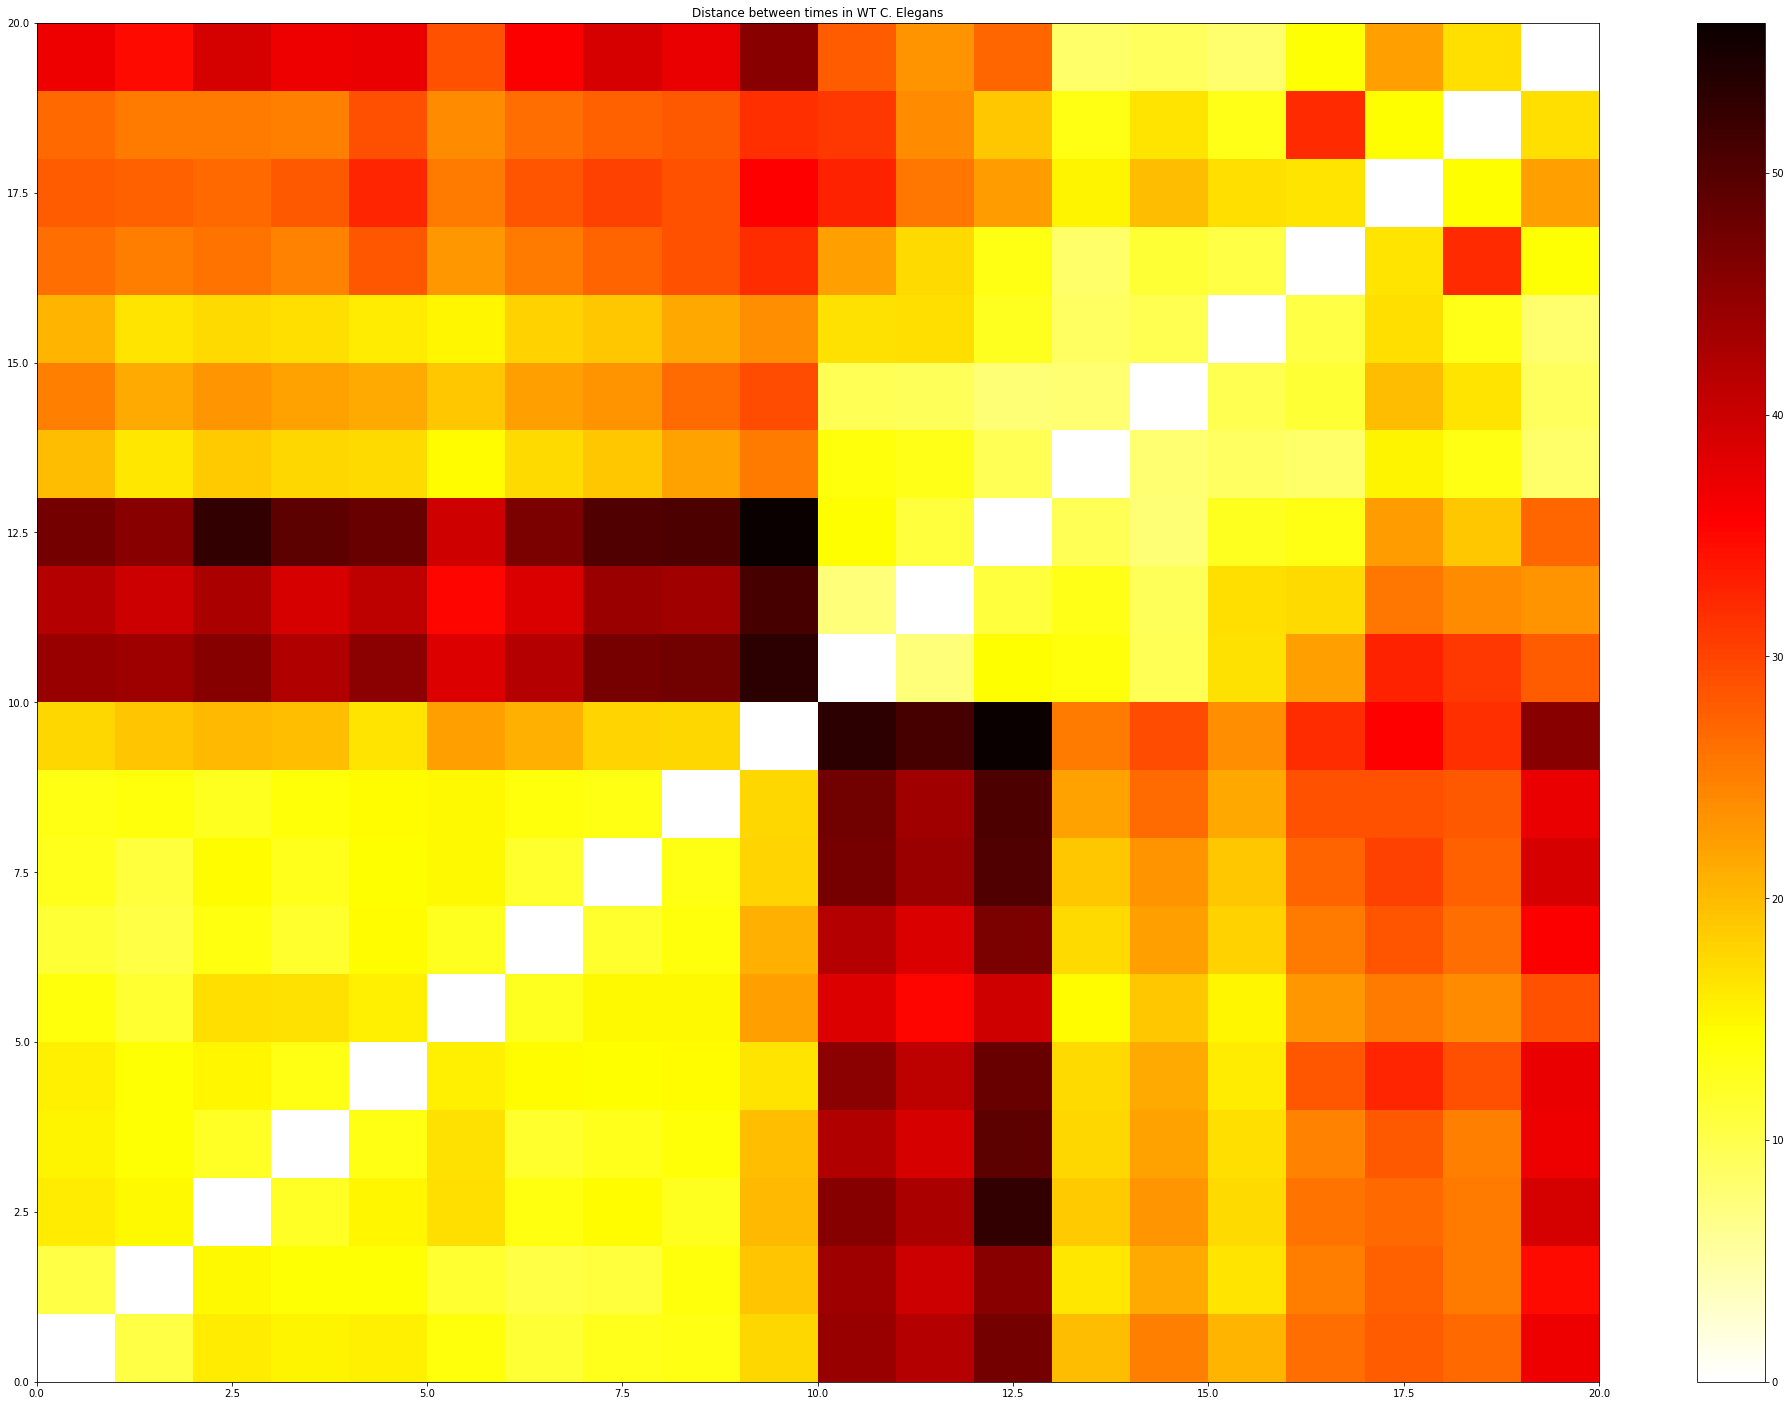

In [989]:
b_mat = np.loadtxt(Departing_cell_url)
plot_2_examples(['hot_r'],b_mat[index_list].T[index_list])

In [990]:
#b_mat = np.loadtxt(Departing_cell_url)
#plot_2_examples(['hot_r'],b_mat[index_list].T)
#RNAi_to_WT_base = b_mat[gene_list].T[inliers]
RNAi_Dep_to_WT_Dep = b_mat[gene_list].T[inliers].flatten()

In [991]:
#b_mat = np.loadtxt('full_b_mat_ABa_x_ABal.txt')
#url has structure departing to destination
#plot_2_examples(['hot_r'],b_mat[0:5,0:3])

#verticality moves on destination axis, and is represented by 0:5 in b_mat[0:5,0:3]
#branch_distance(node_comparison_trimmer(fulldictset[0], 'ABa'), node_comparison_trimmer(fulldictset[1], 'ABal'))
#is equal to  b_mat[1,0]


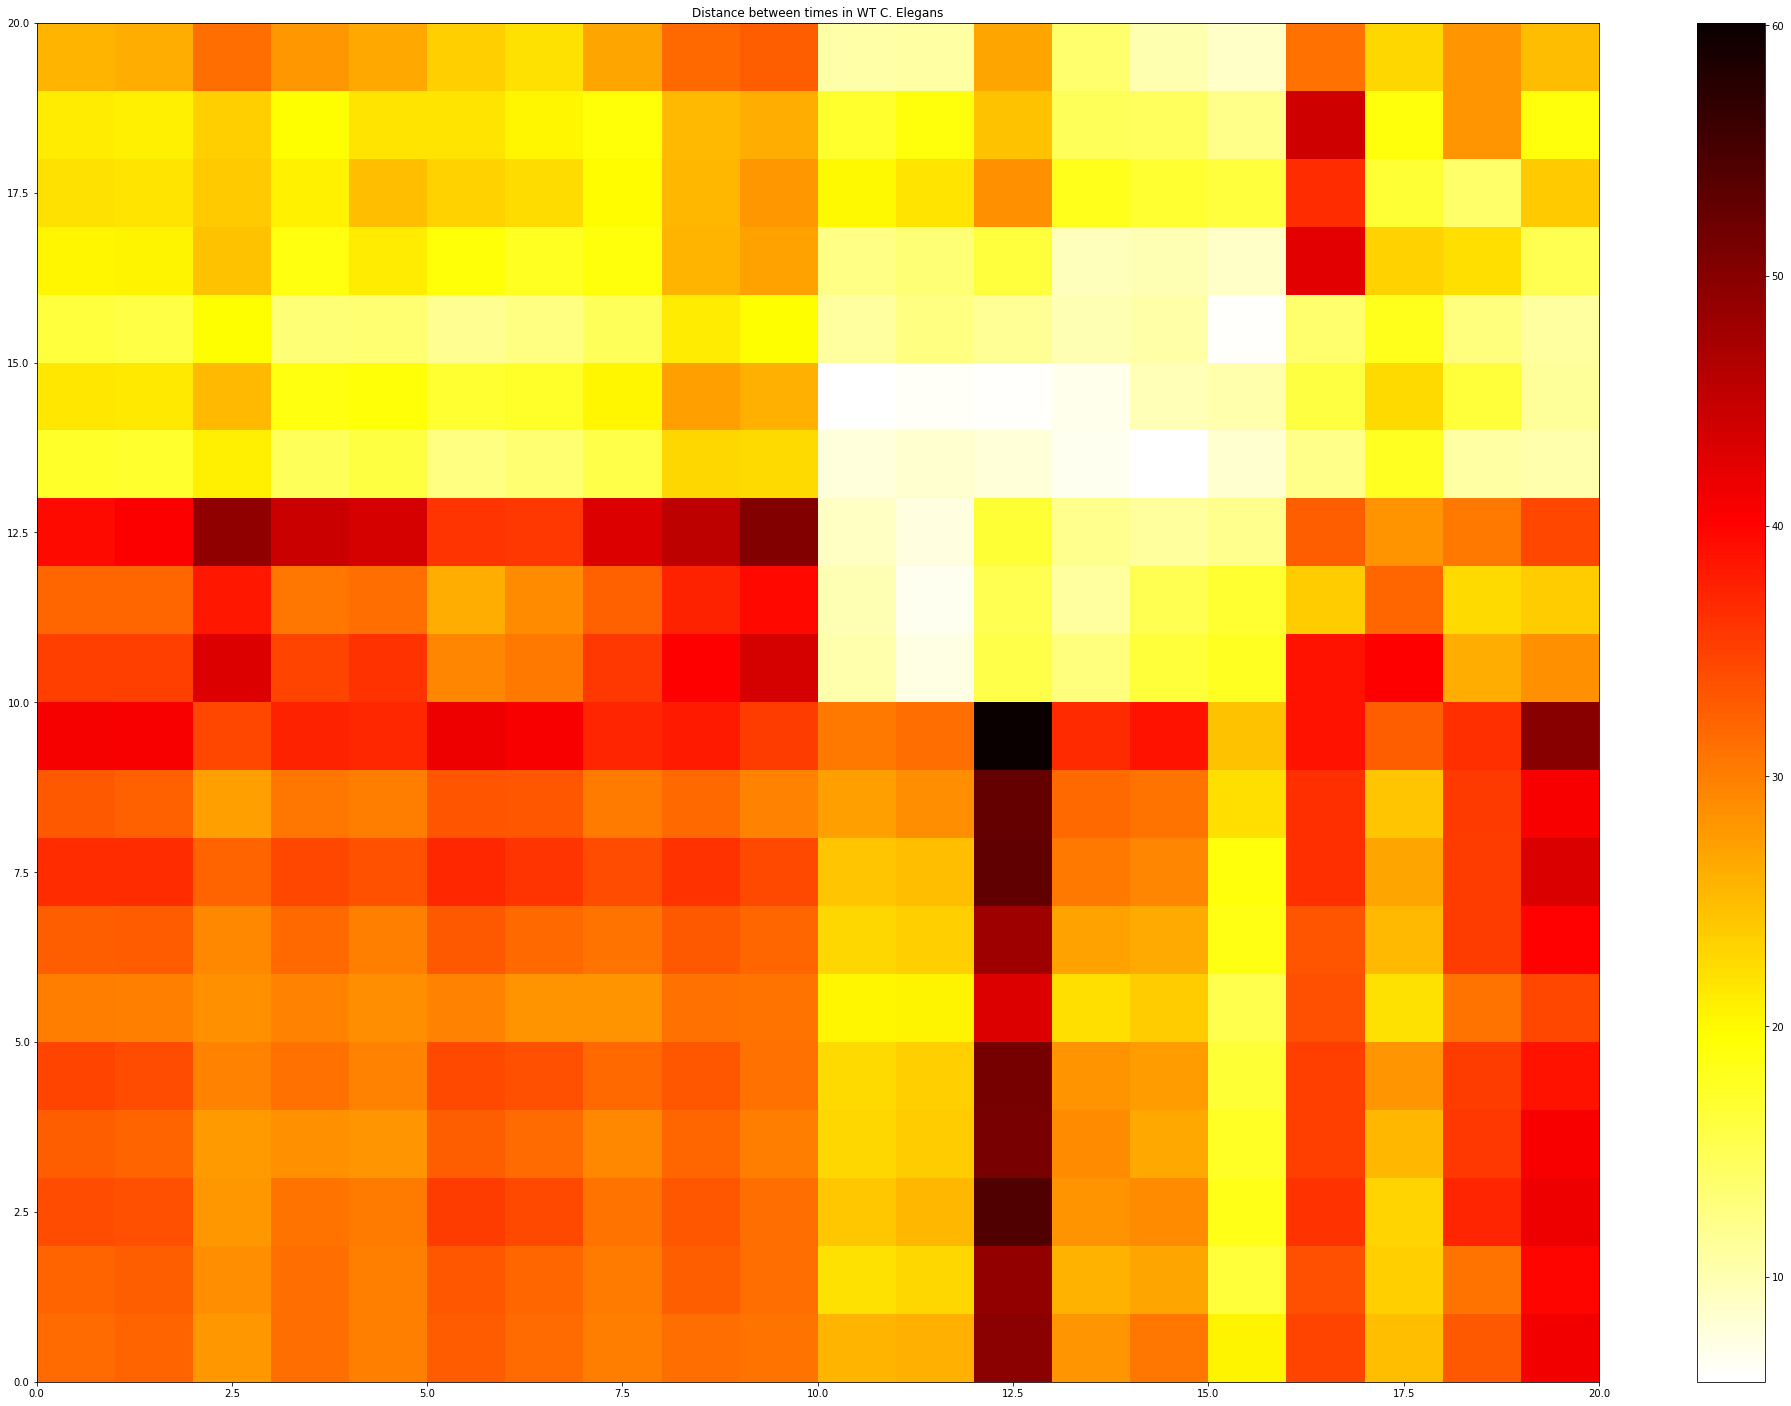

In [992]:
b_mat = np.loadtxt(Travel_url)
plot_2_examples(['hot_r'],b_mat[index_list].T[index_list])
#y axis represents destination fate, x axis represents departing cell.
#Each embryo

In [993]:
#RNAi_dep_to_dest = out_comp( b_mat[gene_list].T[inliers] ),
#WT_dep_to_dest = out_comp (b_mat[inliers].T[inliers] )# inliers, inliers

#b_mat[index_list].T[index_list]
#RNAi_to_WT_2 = b_mat[gene_list].T[inliers]#

#RNAi_Dep_to_WT_Dest = b_mat[gene_list].T[inliers].flatten().tolist()
RNAi_Dep_to_WT_Dest = b_mat[gene_list].T[inliers].flatten()

#plot_2_examples(['hot_r'],RNAi_to_WT_2 - RNAi_to_WT_base)
#RNAi_Dest_to_WT_Dep - RNAi_Dep_to_WT_Dep

In [994]:

#b_mat[a].T[x] means that x changes the vertical component, which is the destination axis
#b_mat[x].T[a] means that x changes the horizontal component, which is the departure axis

In [995]:
#plot_2_examples(['hot_r'],b_mat[index_list].T) #selected gene departure against all destination trees

In [996]:
#plot_2_examples(['hot_r'],b_mat.T[index_list].T) #selected gene destination against all departure trees

In [997]:
#b_mat = np.loadtxt(Destination_Fate_url)
#plot_2_examples(['hot_r'],b_mat[index_list].T[index_list])

In [998]:
#WT_dest_to_dest = self_comp (b_mat[inliers].T[inliers] )

(array([11., 13., 19., 14.,  5., 11.,  8., 11.,  5.,  3.]),
 array([14.52583905, 18.70264232, 22.87944559, 27.05624887, 31.23305214,
        35.40985541, 39.58665869, 43.76346196, 47.94026523, 52.11706851,
        56.29387178]),
 <BarContainer object of 10 artists>)

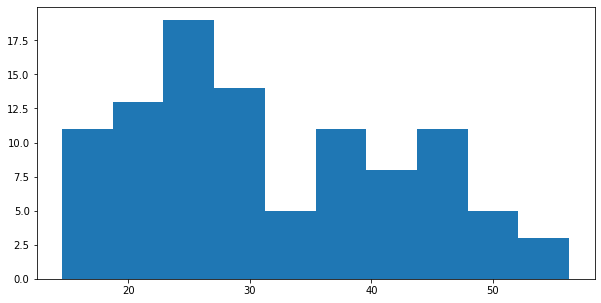

In [1000]:
plt.hist(RNAi_Dep_to_WT_Dep)



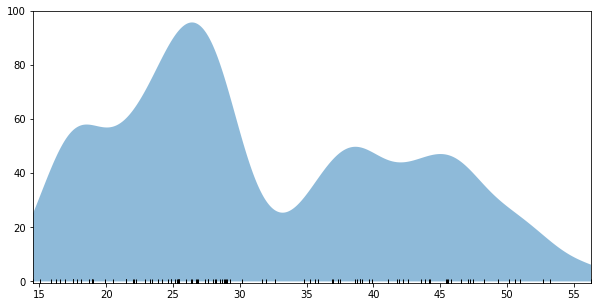

In [1001]:



trip = RNAi_Dep_to_WT_Dep
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,1.9).pdf(x_d) for xi in trip) * 20
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 100]);



(array([ 7., 19., 22., 13., 18.,  9.,  2.,  5.,  4.,  1.]),
 array([15.3622915 , 19.84270593, 24.32312036, 28.80353479, 33.28394923,
        37.76436366, 42.24477809, 46.72519253, 51.20560696, 55.68602139,
        60.16643583]),
 <BarContainer object of 10 artists>)

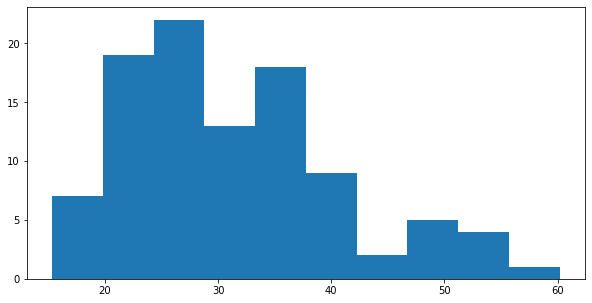

In [1002]:
plt.hist(RNAi_Dep_to_WT_Dest)

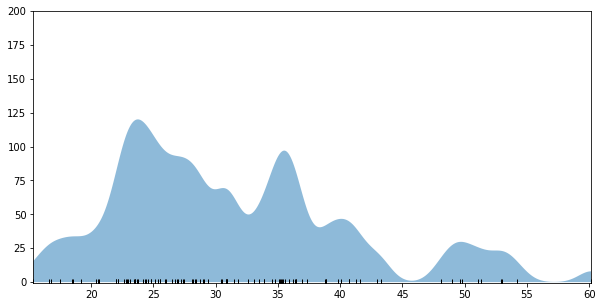

In [1003]:

trip = RNAi_Dep_to_WT_Dest
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,1).pdf(x_d) for xi in trip) * 20
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 200]);


In [1004]:
hold = np.array(RNAi_Dep_to_WT_Dep) - np.array(RNAi_Dep_to_WT_Dest)

(array([17., 19., 21., 13., 10.,  0.,  0.,  5.,  6.,  9.]),
 array([-12.02469393,  -8.54183956,  -5.05898519,  -1.57613082,
          1.90672355,   5.38957792,   8.87243229,  12.35528666,
         15.83814103,  19.3209954 ,  22.80384977]),
 <BarContainer object of 10 artists>)

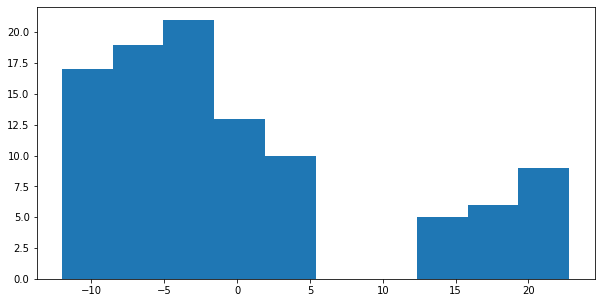

In [1005]:
plt.hist(hold)

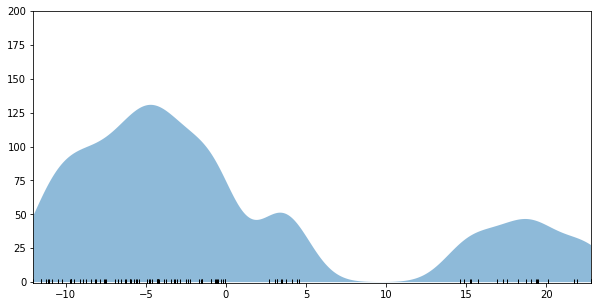

In [1006]:
trip = hold
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,1.5).pdf(x_d) for xi in trip) * 20
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 200]);

In [ ]:
np.mean(hold),np.std(hold)

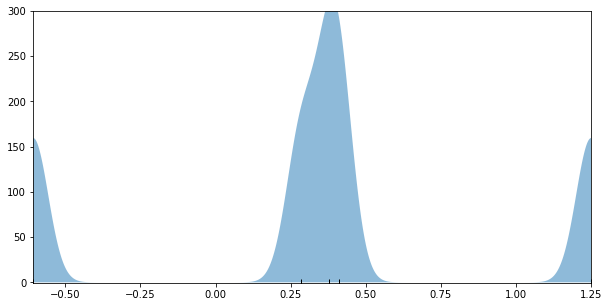

In [957]:
'''
trip = data
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.05).pdf(x_d) for xi in trip) * 20
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 300]);'''

ABa
ABp
ABal
ABar
ABpl
ABpr
ABala
ABalp
ABara
ABarp
ABpla
ABplp
ABpra
ABprp
EMS


/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]


P2
MS
E
C


/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]


P3


/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_1635437/4175741318.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  re

D


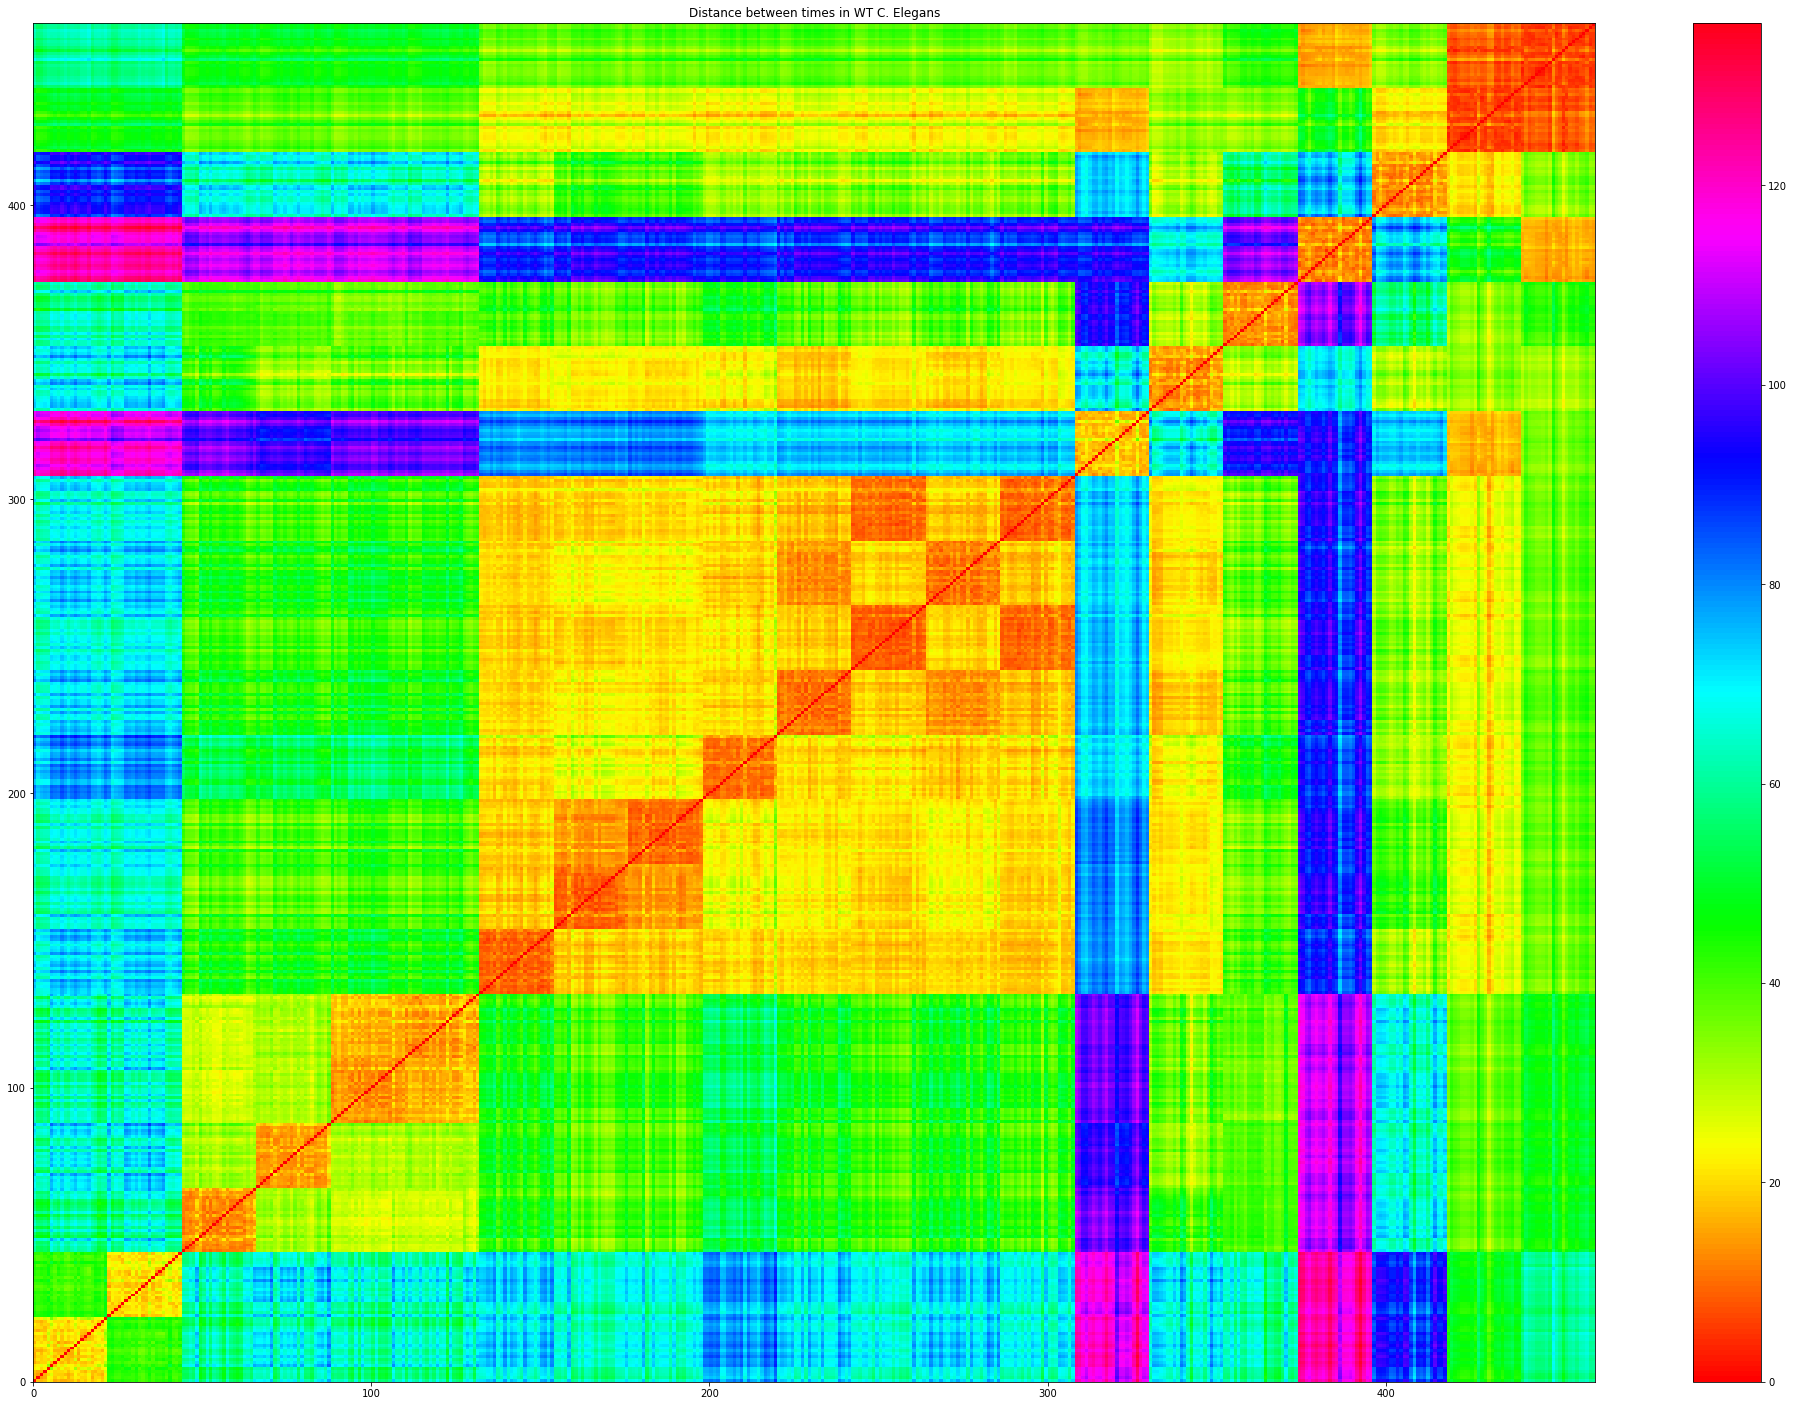

In [75]:
b_mat = [];cos_mat = [];jac_mat = [];PCA_mat = []
for n in root_cells_comp:
    for m in inlier_ref:
        branches = []; cos_row = []; jac_row = []; PCA_row = []
        nim = node_comparison_trimmer(fulldictset[m],n)
        for a in root_cells_comp:
            for b in inlier_ref:
                ab = node_comparison_trimmer(fulldictset[b],a)
                cos_row.append(cosine_pseudodistance(nim,ab))
                branches.append(branch_distance(nim,ab))
                jac_row.append(jaccard_distance(nim,ab))
                PCA_row.append(PCA_slope(nim,ab))
        b_mat.append(branches)
        cos_mat.append(cos_row)
        jac_mat.append(jac_row)
        PCA_mat.append(PCA_row)
    print(n)
cos_mat = np.mat(cos_mat)
WT_subtree_mat = b_mat = np.mat(b_mat)     
jac_mat = np.mat(jac_mat)
PCA_mat = np.mat(PCA_mat)
#plot_2_examples(['viridis'],b_mat)
plot_2_examples(['hsv'],b_mat)

In [40]:
#nim = node_comparison_trimmer(fulldictset[0],'ABp');ab = node_comparison_trimmer(fulldictset[29],'ABa')

In [273]:
PCA_slope(nim,ab),PCA_slope(ab,nim),1-PCA_slope(ab,nim),1-PCA_slope(nim,ab)

(1.0000000000000002,
 1.0000000000000002,
 -2.220446049250313e-16,
 -2.220446049250313e-16)

In [274]:
np.log(PCA_slope(nim,ab)),np.log(PCA_slope(ab,nim))

(2.2204460492503128e-16, 2.2204460492503128e-16)

In [275]:
np.sum(PCA_mat == np.inf)
PCA_mat[PCA_mat == np.inf] = np.e
interest = np.where(PCA_mat == np.e)
interest2 = np.where(PCA_mat == np.nan)

In [276]:
#PCA_mat # [interest,interest]
interest,interest2

((array([332, 333, 343, 348, 422, 435, 440, 445, 445, 445, 445, 445, 445,
         445, 445, 445, 445, 445, 445, 446, 446, 447, 454, 454, 455, 456,
         460, 460, 460, 460, 460, 460, 460, 460, 460, 460, 460, 460, 460,
         460, 460, 461]),
  array([445, 445, 441, 441, 449, 445, 422, 330, 331, 335, 337, 338, 341,
         344, 345, 346, 351, 418, 432, 343, 348, 422, 426, 431, 423, 422,
         330, 331, 332, 333, 335, 337, 338, 341, 344, 345, 346, 351, 418,
         432, 435, 422])),
 (array([], dtype=int64), array([], dtype=int64)))

In [281]:
PCA_2_mat

array([[1.        , 0.90764332, 0.95319106, ..., 8.49380129, 4.41906338,
        7.12343261],
       [1.10175437, 1.        , 1.04989843, ..., 5.47946913, 2.23918388,
        3.55947882],
       [1.04910762, 0.95247309, 1.        , ..., 4.09868174, 2.1021985 ,
        3.45080445],
       ...,
       [0.11773292, 0.18249943, 0.24398089, ..., 1.        , 0.58342526,
        0.90918143],
       [0.2262923 , 0.44659128, 0.47569247, ..., 1.7140156 , 1.        ,
        1.53934611],
       [0.14038176, 0.28094001, 0.2897875 , ..., 1.09989048, 0.64962648,
        1.        ]])

In [309]:
PCA_2_mat = np.array(PCA_mat)

PCA_2_mat[PCA_2_mat > 10] = 10
PCA_2_mat[PCA_2_mat <= .000001] = .000001

#PCA_2_mat[PCA_2_mat <= .00000001] = .00000001

#plot_2_examples(['hot_r'],PCA_2_mat)
print(root_cells_comp)

['ABa', 'ABp', 'ABal', 'ABar', 'ABpl', 'ABpr', 'ABala', 'ABalp', 'ABara', 'ABarp', 'ABpla', 'ABplp', 'ABpra', 'ABprp', 'EMS', 'P2', 'MS', 'E', 'C', 'P3', 'D']


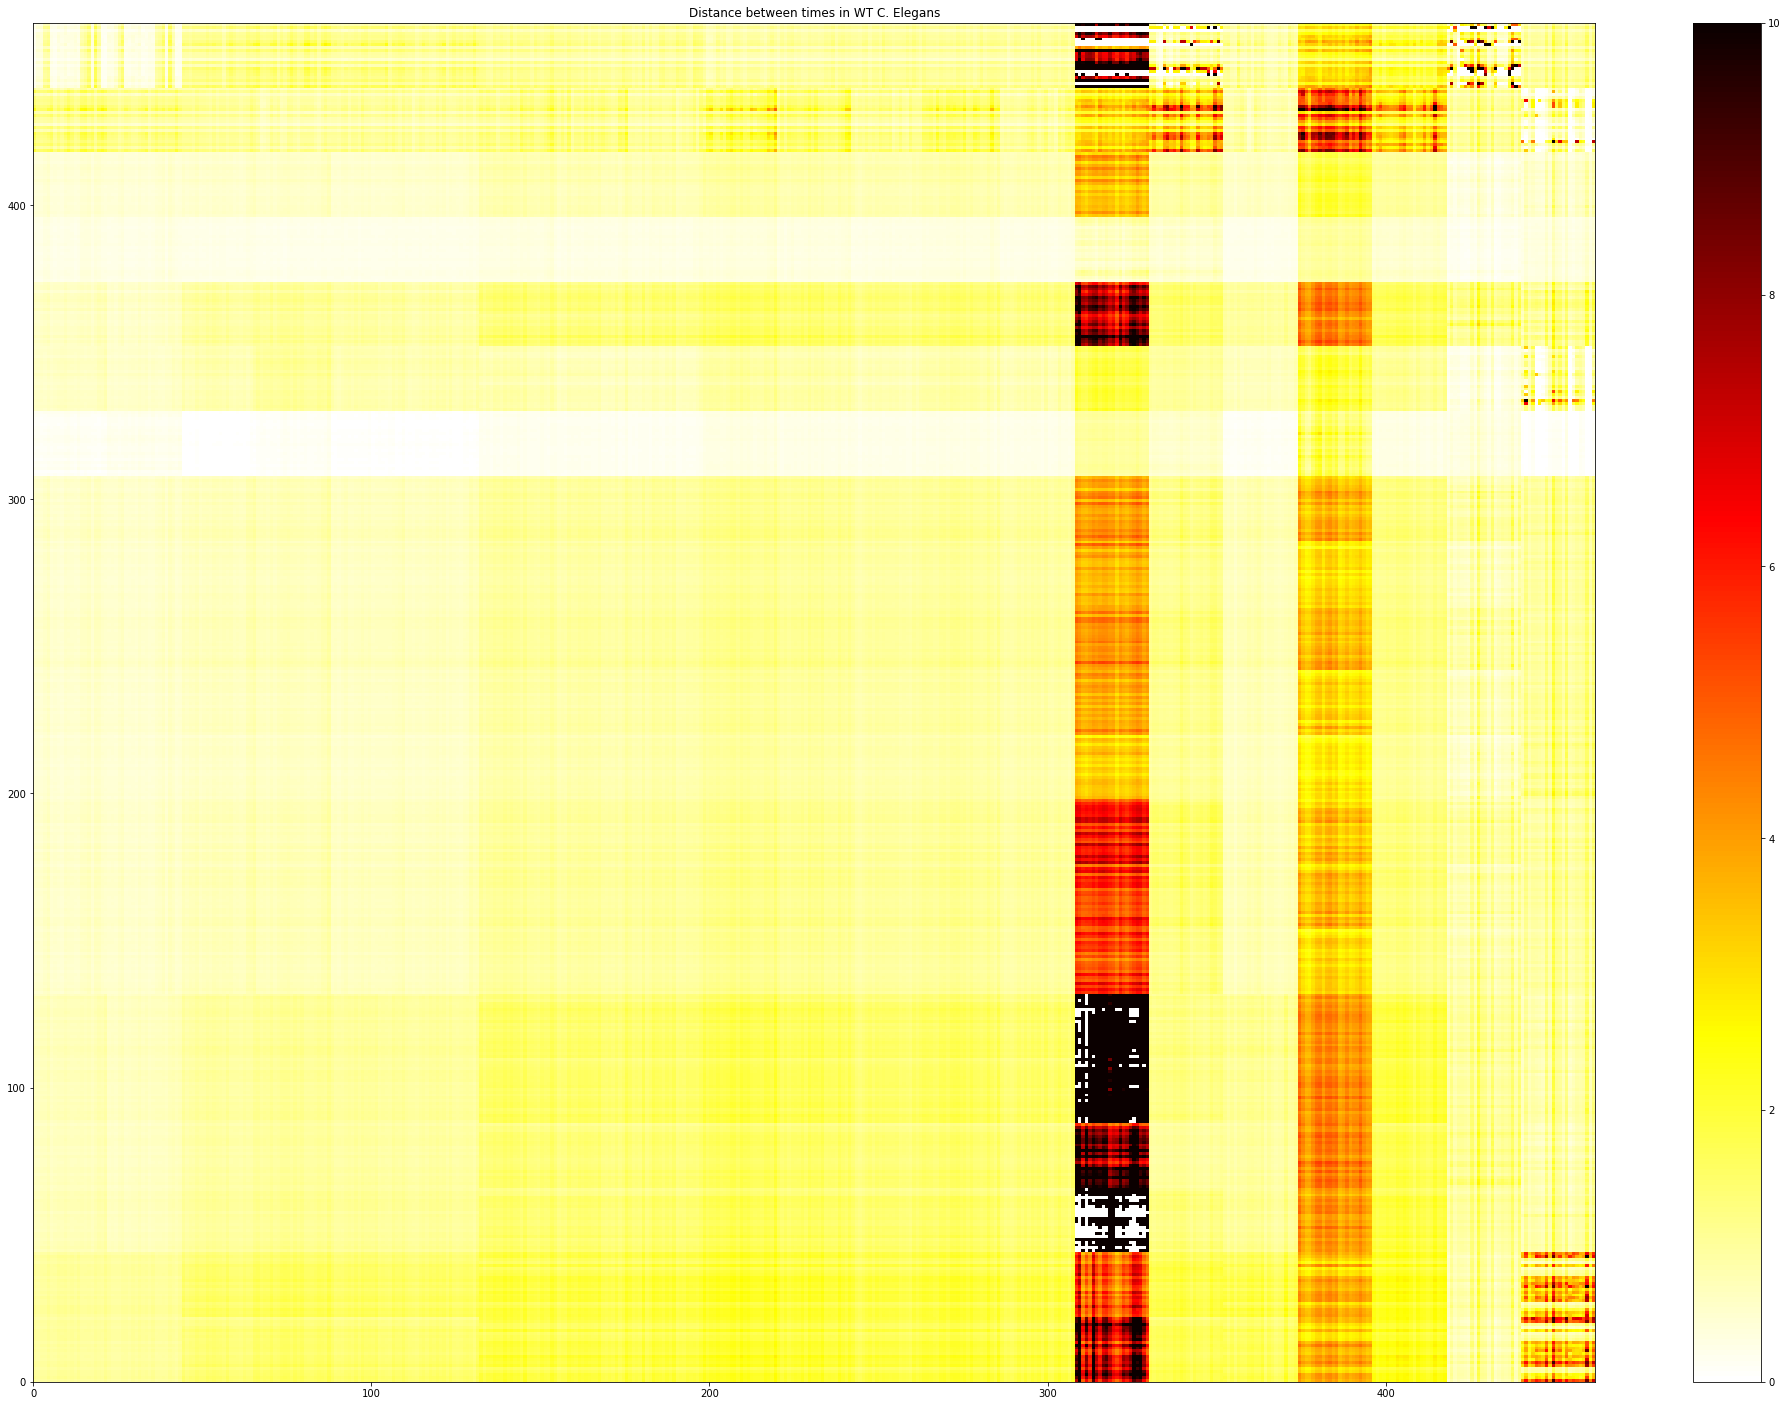

In [310]:
plot_2_examples(['hot_r'],PCA_2_mat)

In [311]:
PCA_3_mat = np.log(PCA_2_mat)

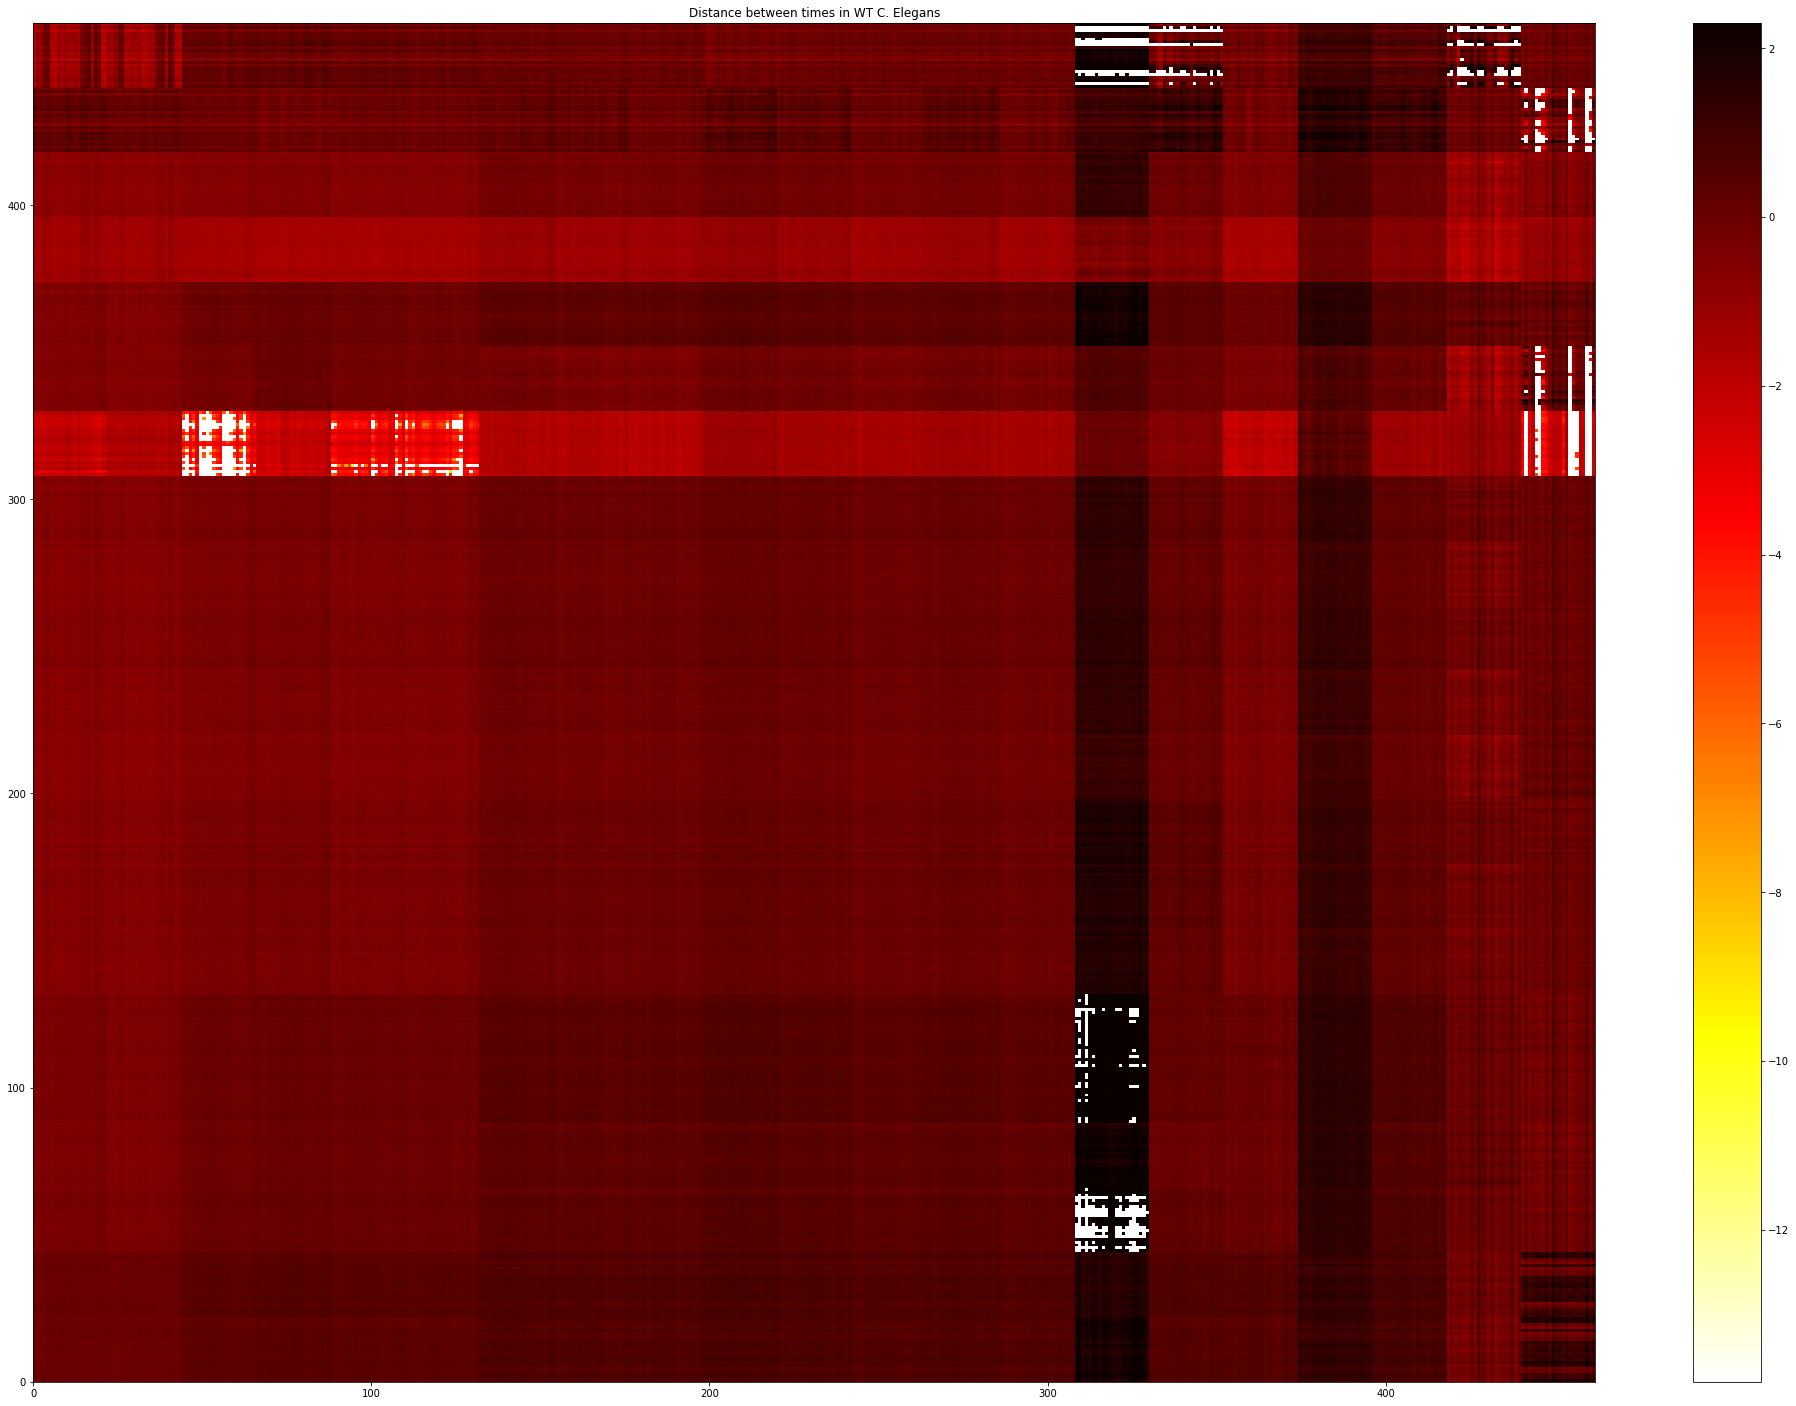

In [312]:
plot_2_examples(['hot_r'],PCA_3_mat)

In [266]:
#PCA_3_mat[PCA_3_mat > 10] = 10
#PCA_3_mat[PCA_3_mat < -18.420680743952367] = -10.71641577190645

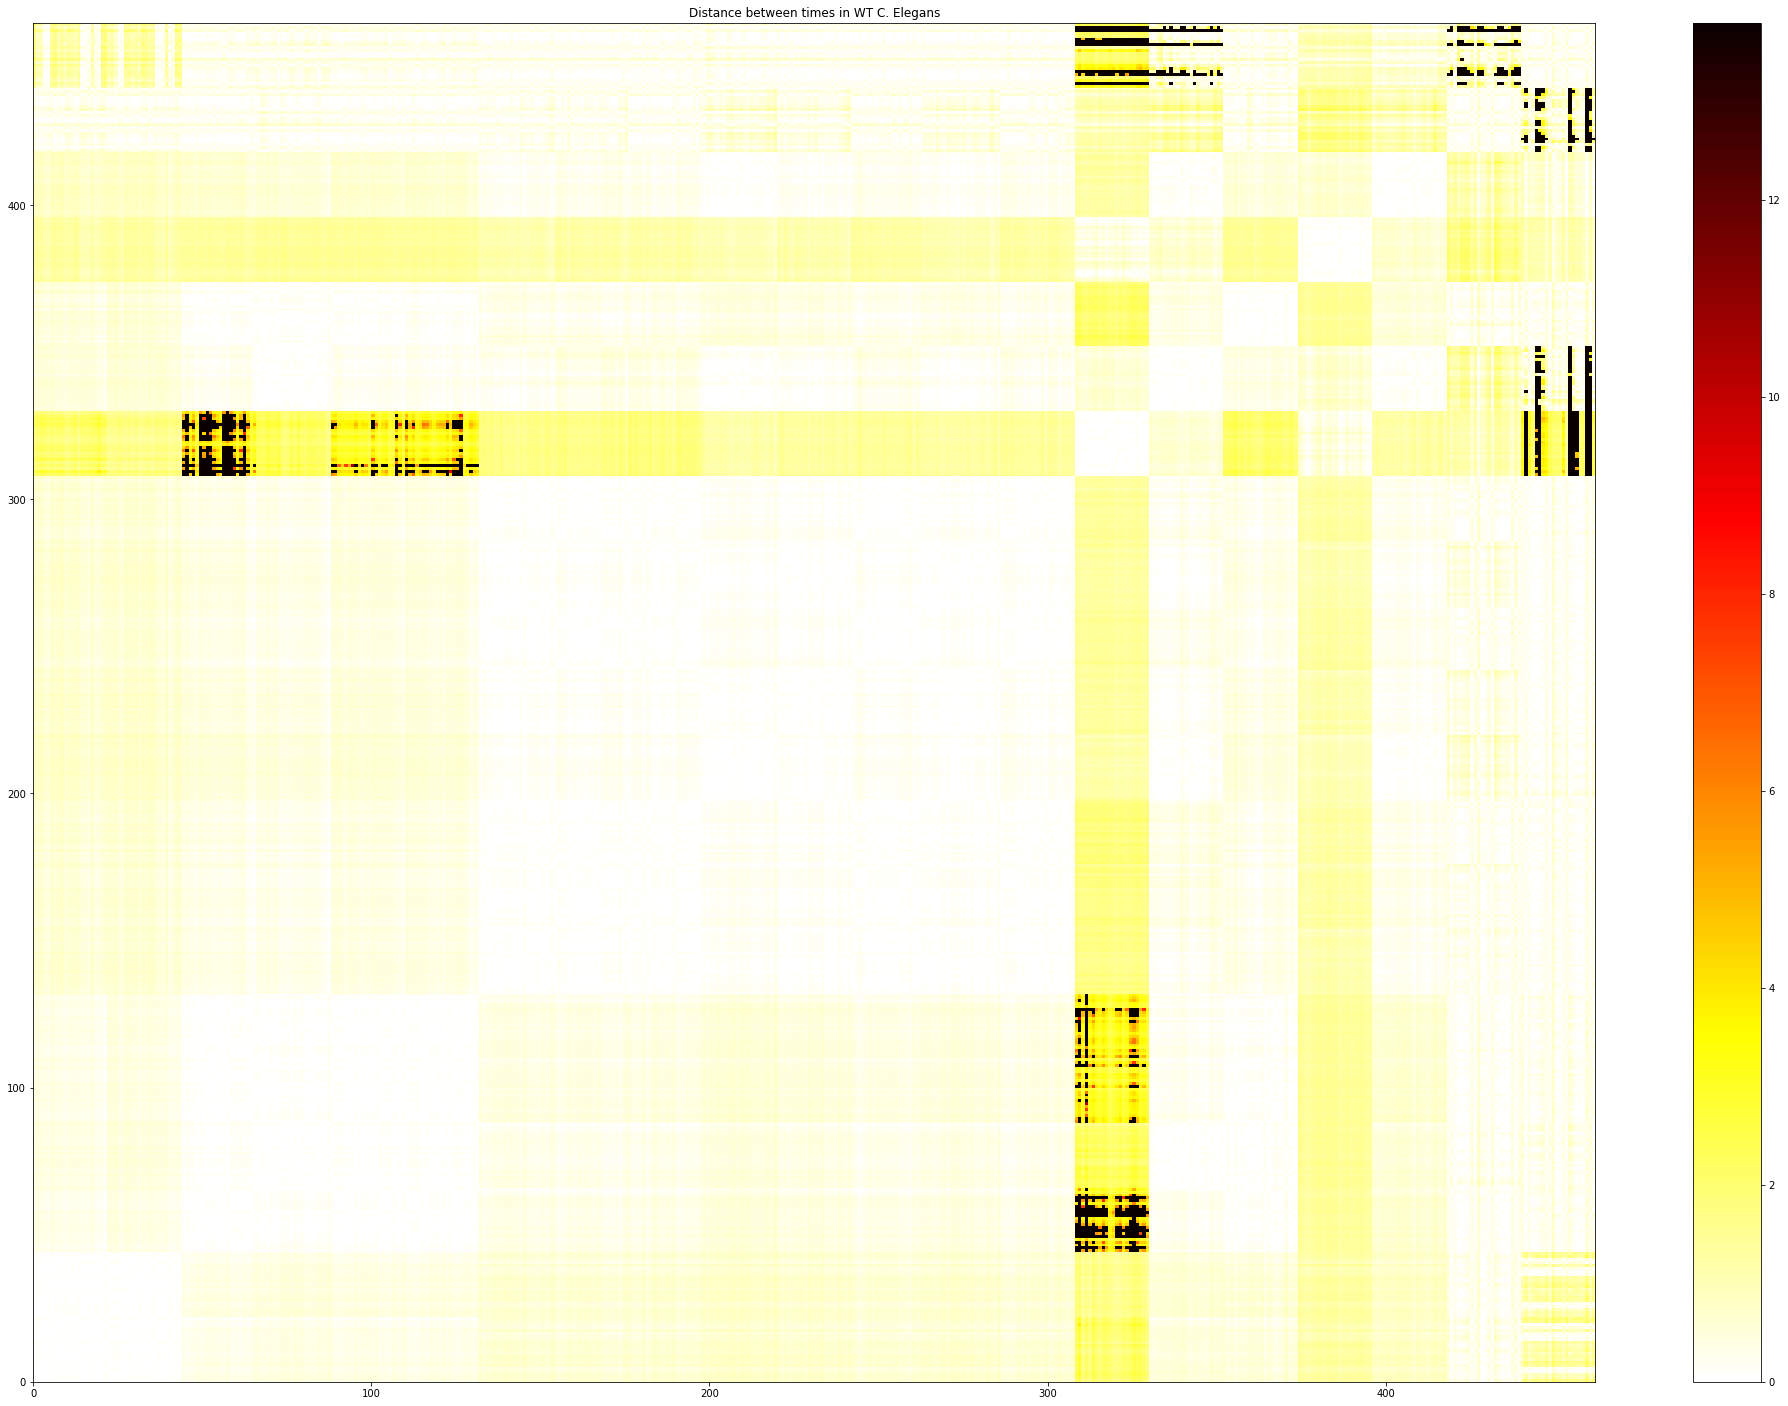

In [267]:
plot_2_examples(['hot_r'],abs(PCA_3_mat))

In [269]:
#gimp = sorted(self_comp(PCA_3_mat))

#plt.hist(gimp)
#print(gimp)

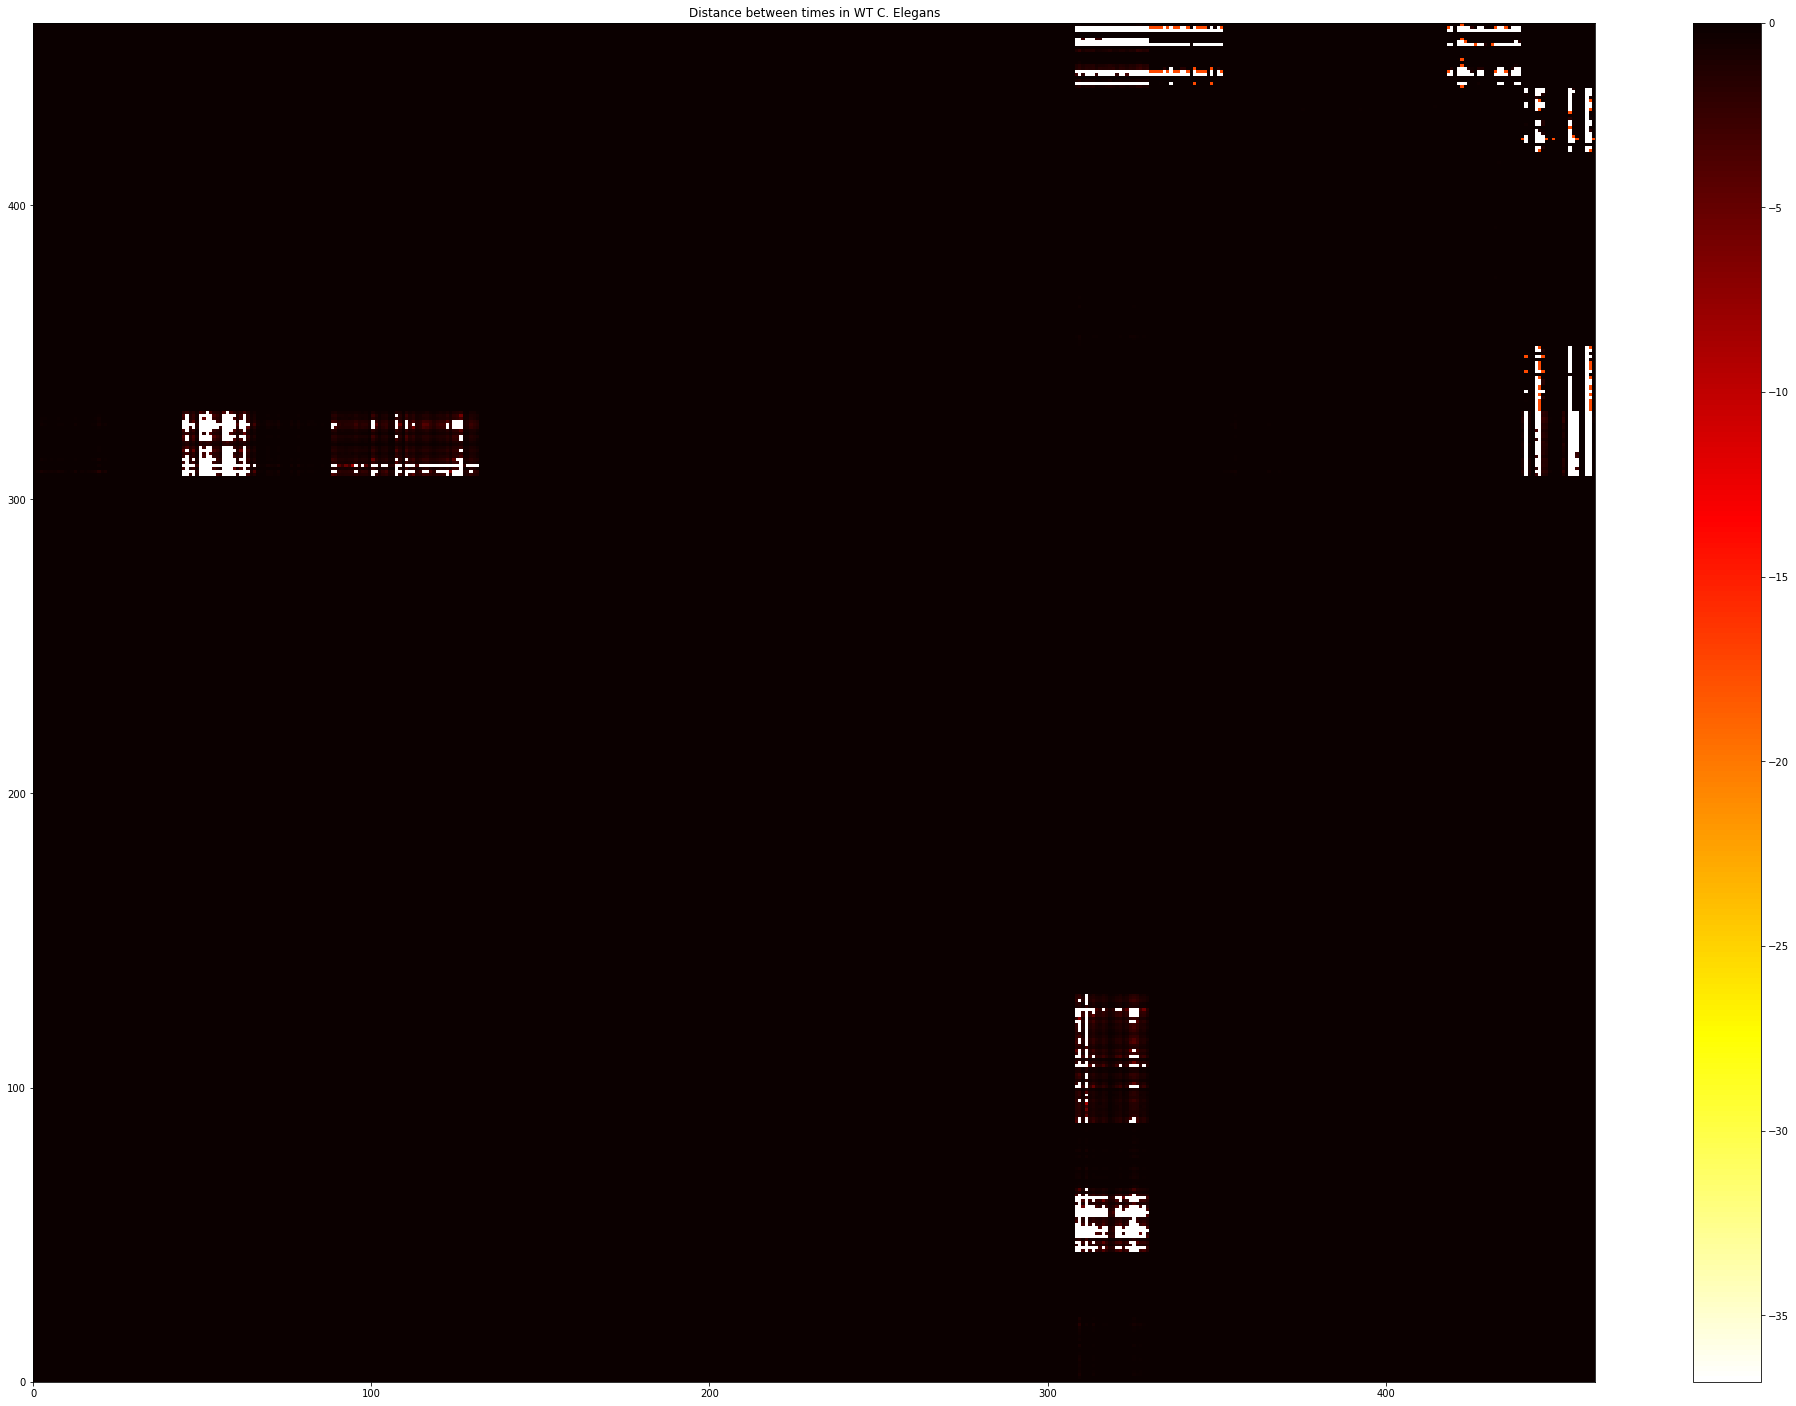

In [217]:
plot_2_examples(['hot_r'],np.log(PCA_2_mat) + np.log(PCA_2_mat).T)

In [211]:
#chute = PCA_mat.flatten().tolist()[0]

array([-10., -10., -10., ...,  10.,  10.,  10.])

In [307]:
#node_comparison_trimmer(fulldictset[1],'EMS')

In [308]:
#node_comparison_trimmer(fulldictset[1],'ABar')

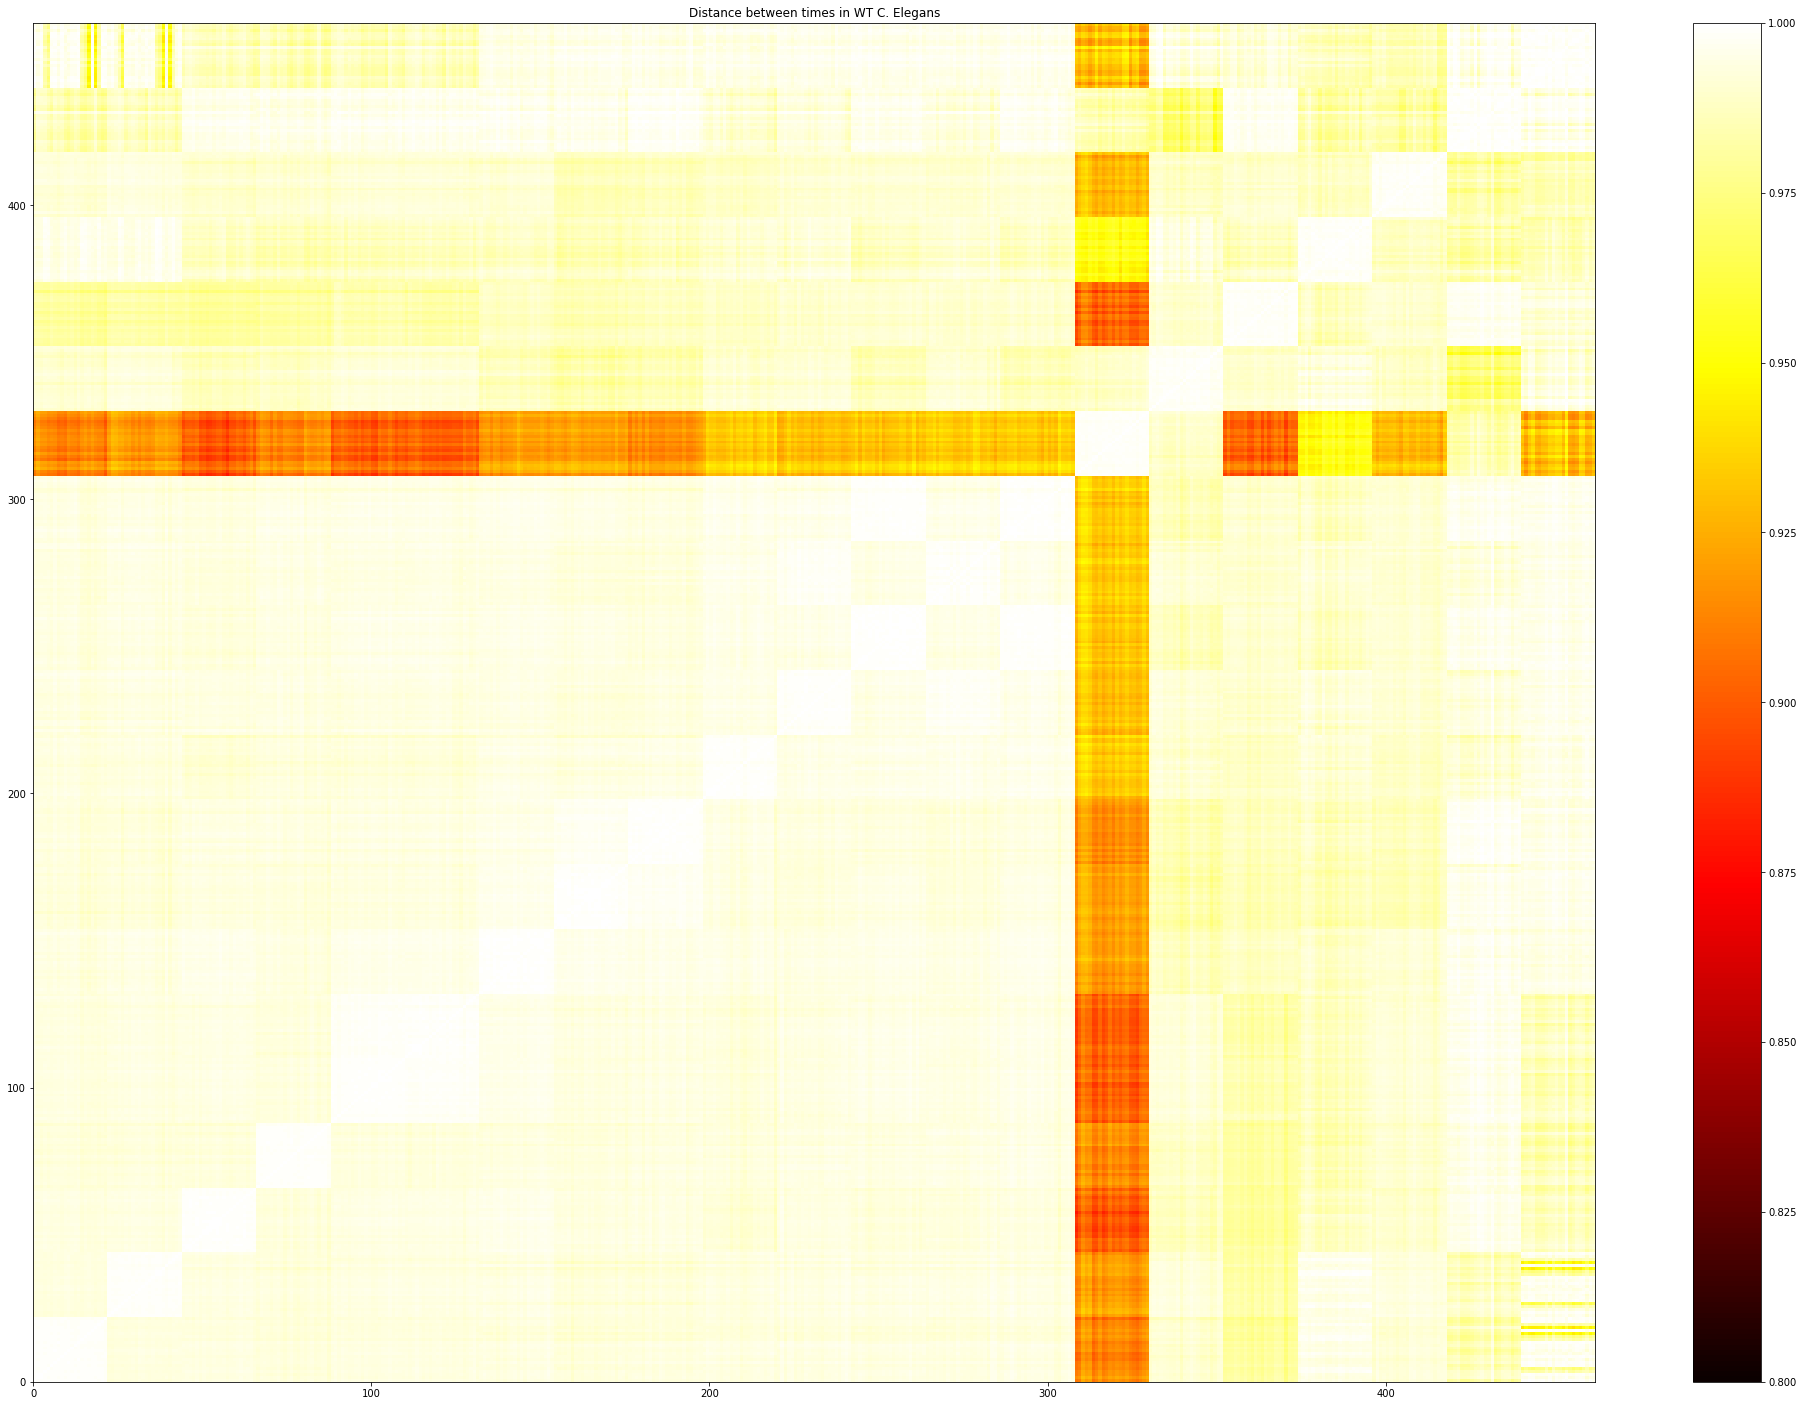

In [315]:
plot_2_examples(['hot'],cos_mat)

['ABa', 'ABp', 'ABal', 'ABar', 'ABpl', 'ABpr', 'ABala', 'ABalp', 'ABara', 'ABarp', 'ABpla', 'ABplp', 'ABpra', 'ABprp', 'EMS', 'P2', 'MS', 'E', 'C', 'P3', 'D']


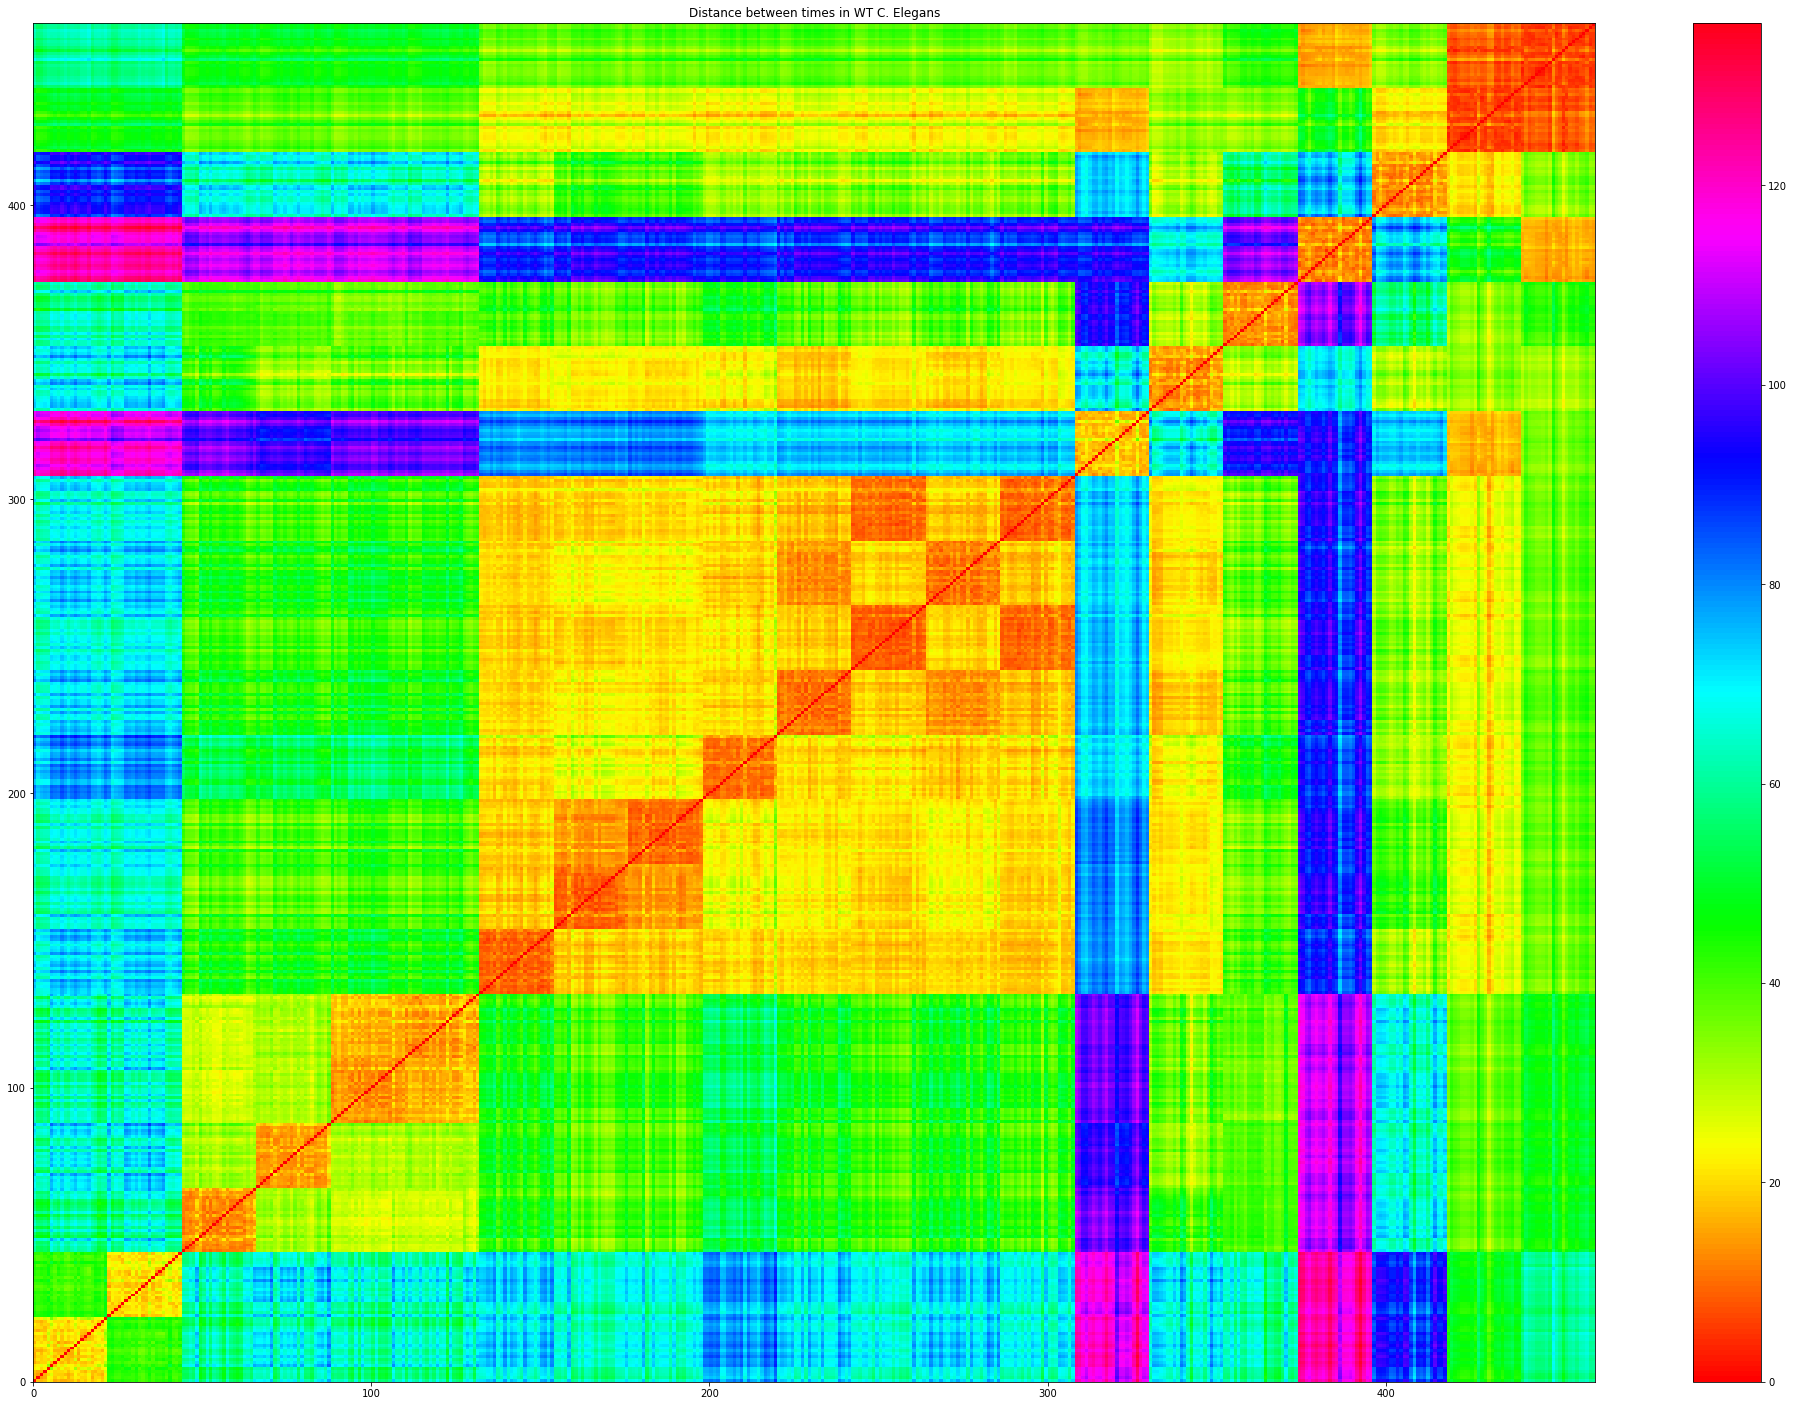

In [44]:
print(root_cells_comp)
plot_2_examples(['hsv'],WT_subtree_mat)
#WT_subtree_mat = b_mat

In [1029]:
(root_cells_comp.index('ABar')*len(inlier_ref),(1+root_cells_comp.index('ABar'))*len(inlier_ref) )

(66, 88)

In [1031]:
(root_cells_comp.index('ABal')*len(inlier_ref),(1+root_cells_comp.index('ABal'))*len(inlier_ref) )

(44, 66)

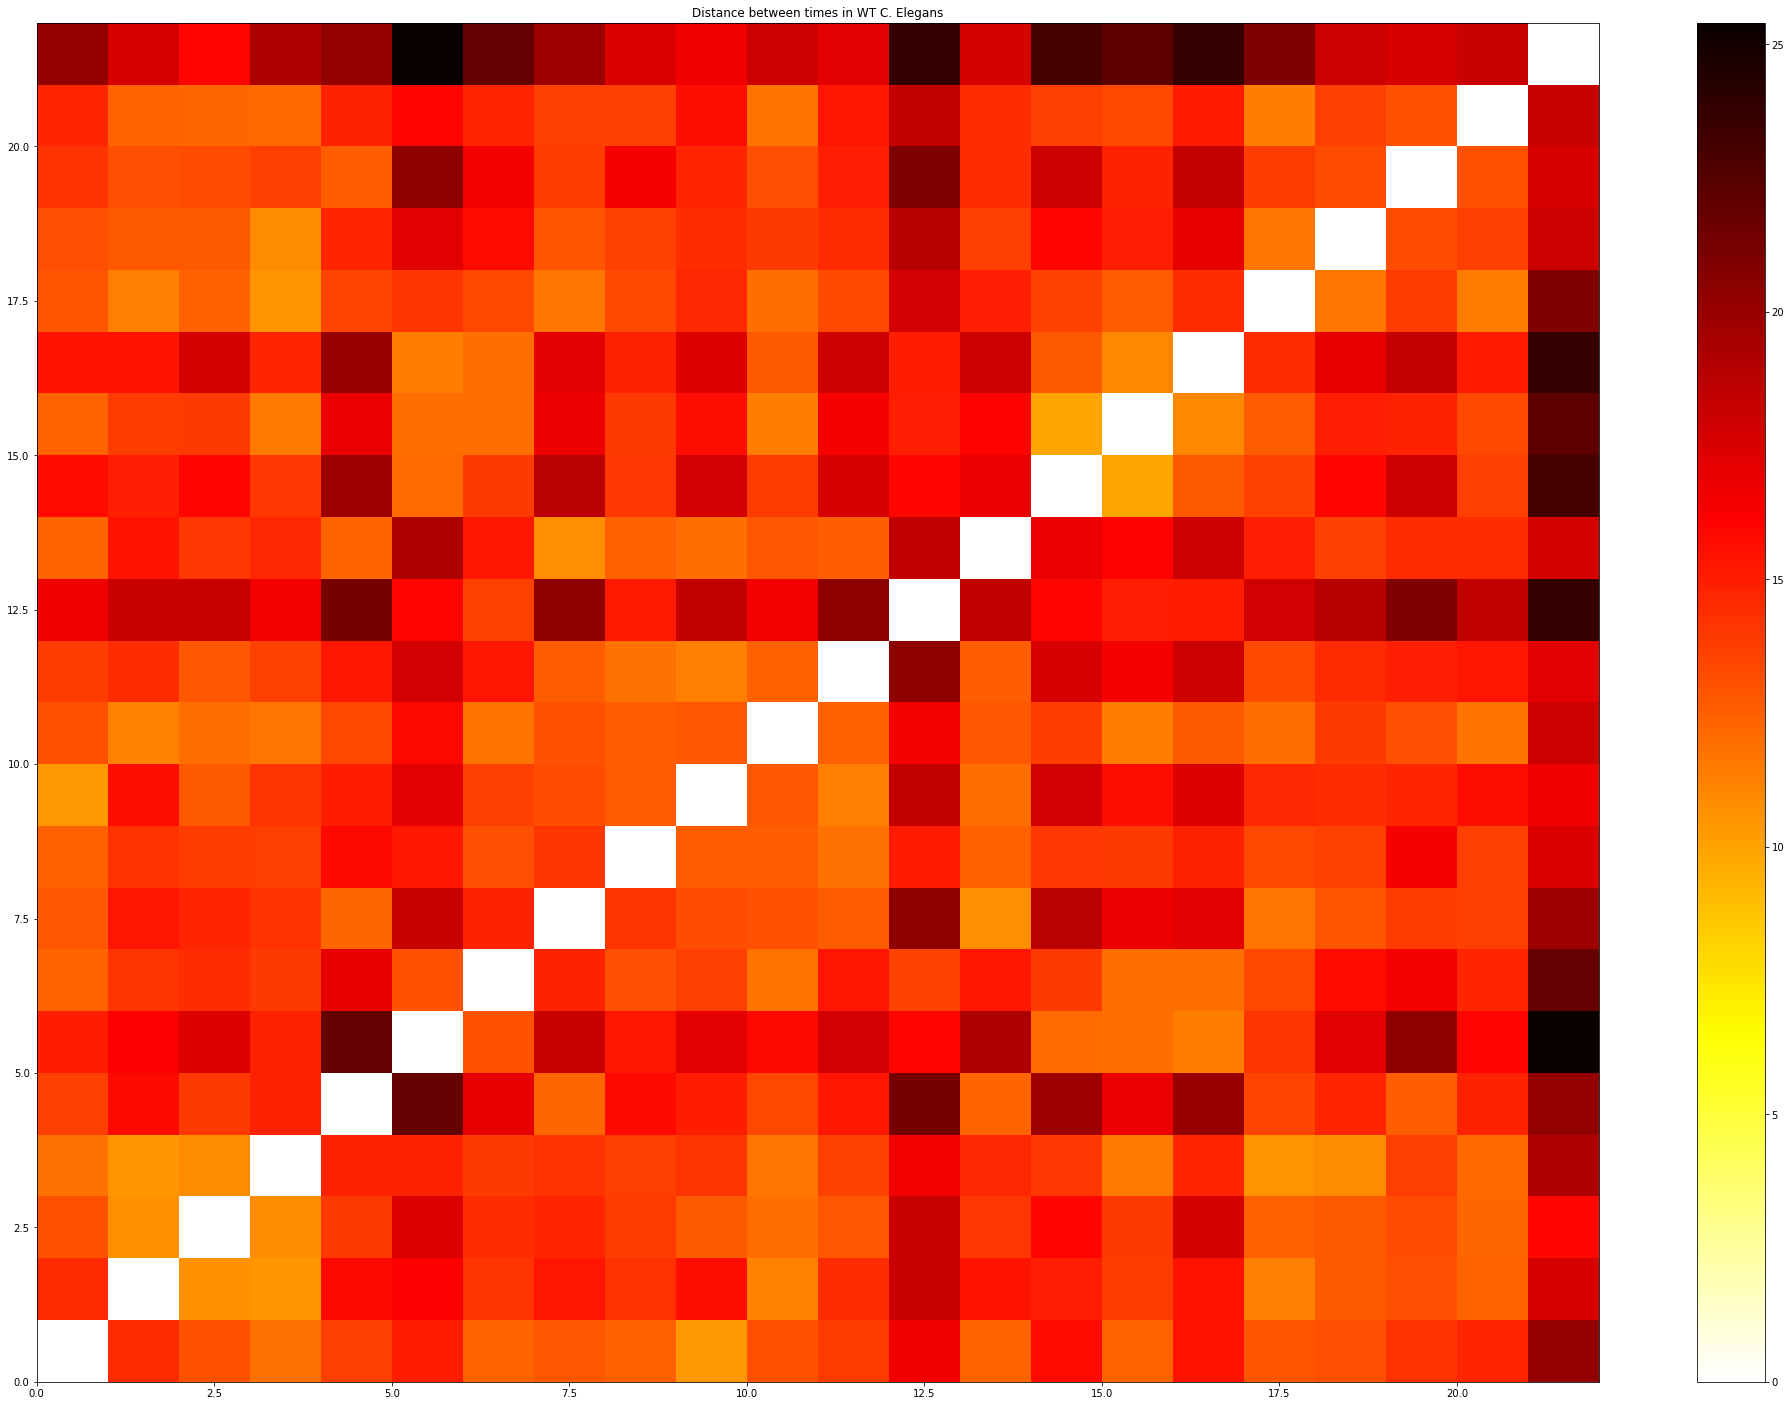

In [1048]:
plot_2_examples(['hot_r'],WT_subtree_mat[66:88,66:88])

(array([15., 44., 59., 50., 23., 20., 10.,  6.,  3.,  1.]),
 array([ 9.8488578 , 11.41151986, 12.97418192, 14.53684398, 16.09950604,
        17.6621681 , 19.22483016, 20.78749222, 22.35015428, 23.91281635,
        25.47547841]),
 <BarContainer object of 10 artists>)

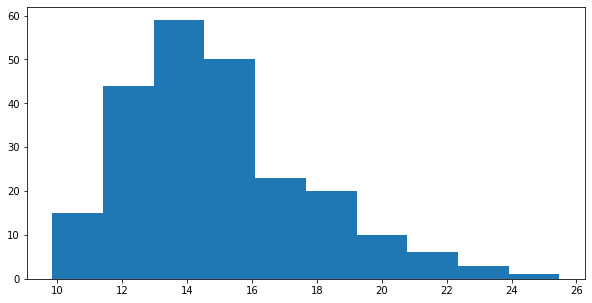

In [1057]:
plt.hist(self_comp(WT_subtree_mat[66:88,66:88]))

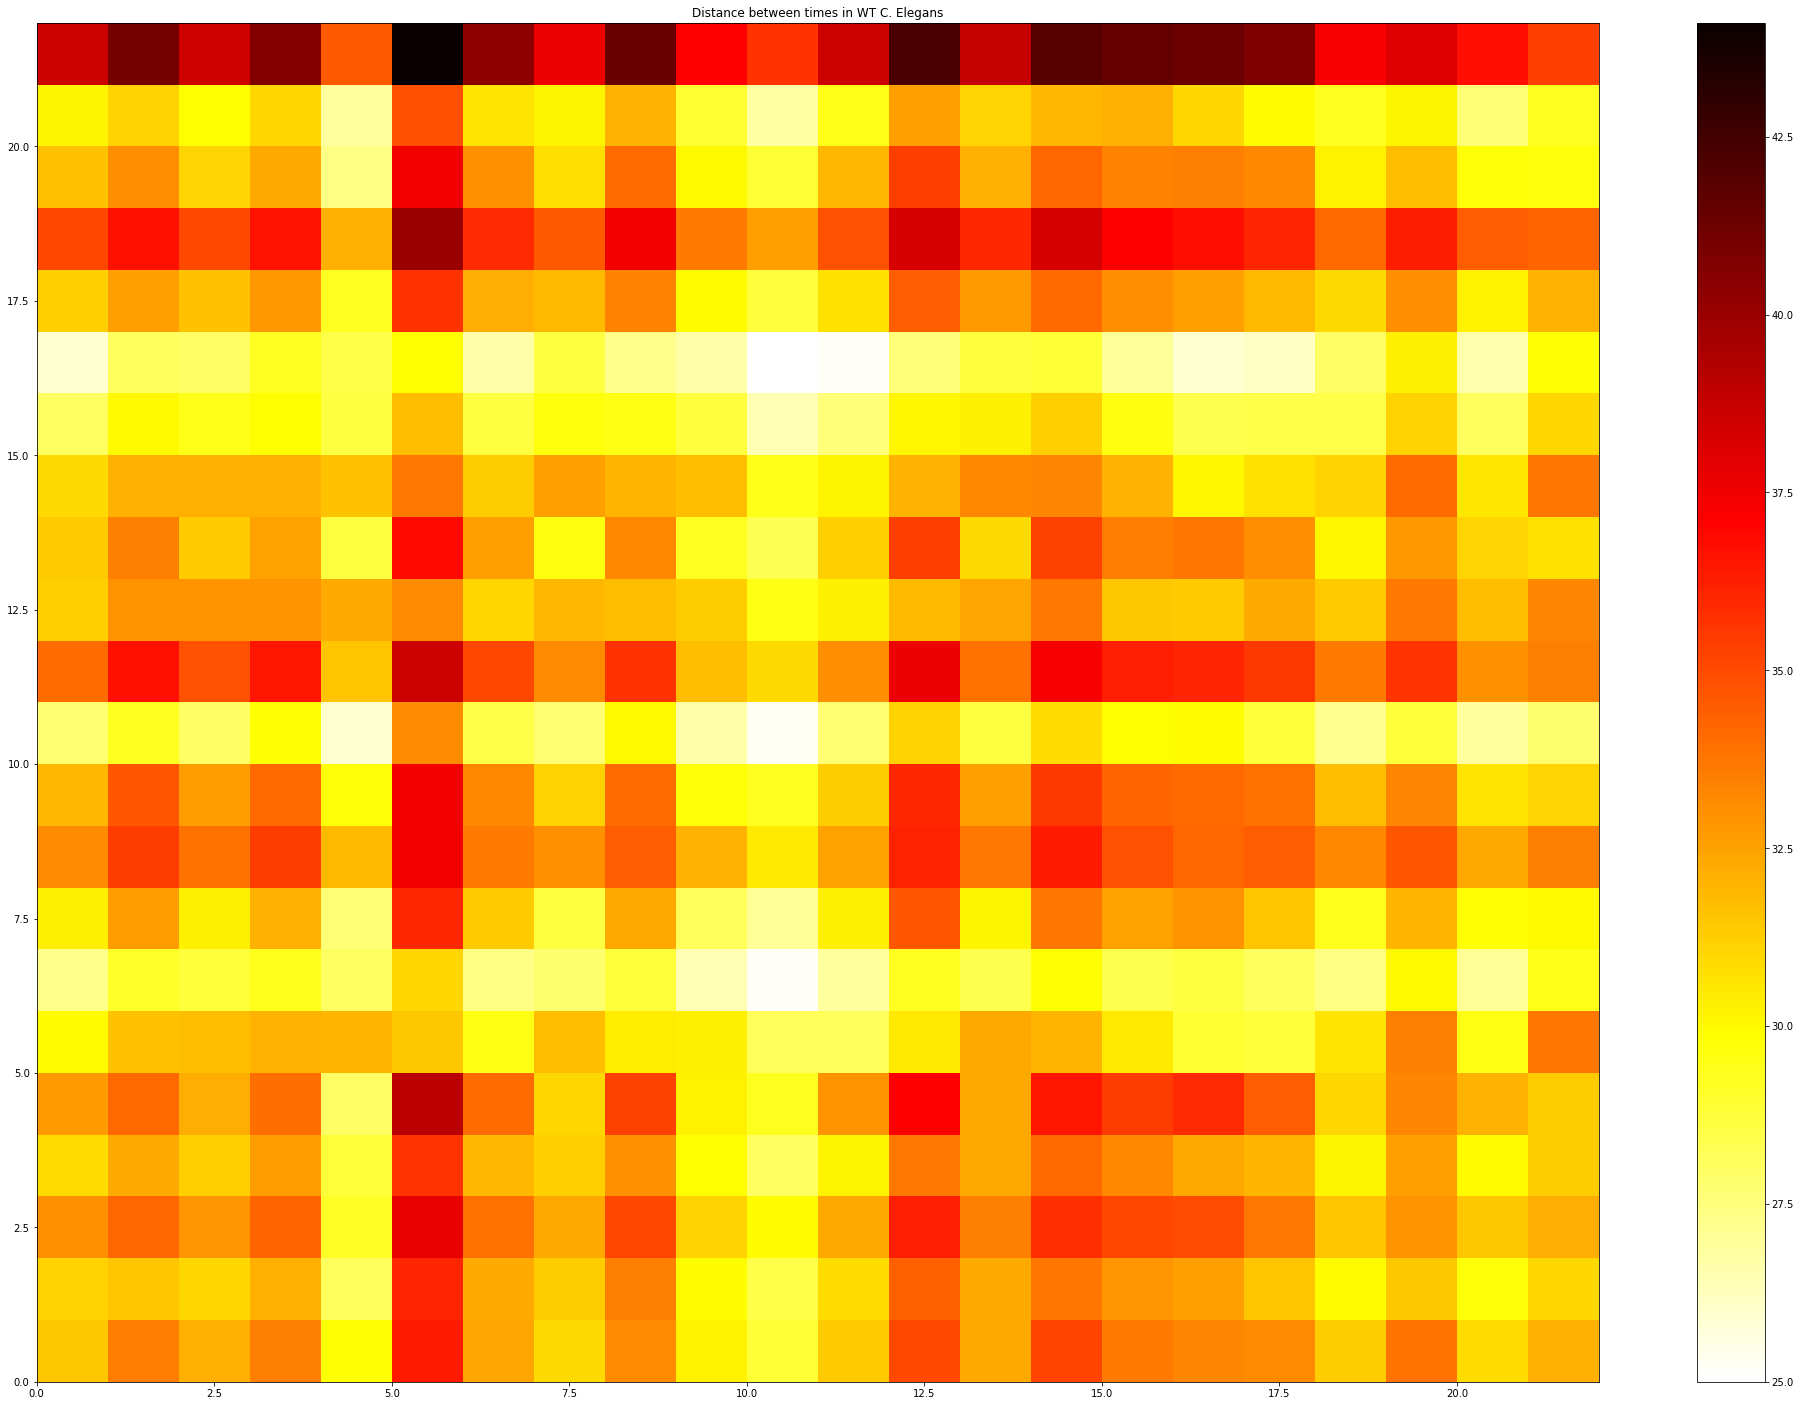

In [1049]:
plot_2_examples(['hot_r'],WT_subtree_mat[66:88,44:66])

(array([ 18.,  58.,  88., 137.,  98.,  45.,  23.,   7.,   8.,   2.]),
 array([25.03996805, 26.94958654, 28.85920504, 30.76882353, 32.67844202,
        34.58806052, 36.49767901, 38.4072975 , 40.316916  , 42.22653449,
        44.13615298]),
 <BarContainer object of 10 artists>)

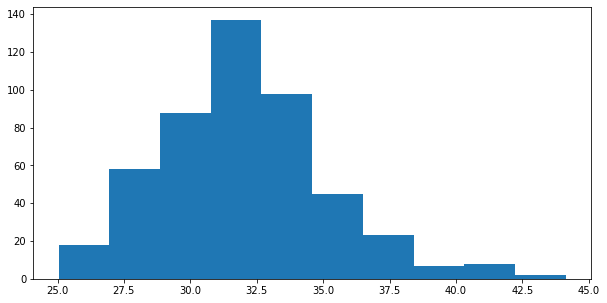

In [1059]:
plt.hist(out_comp(WT_subtree_mat[66:88,44:66]))

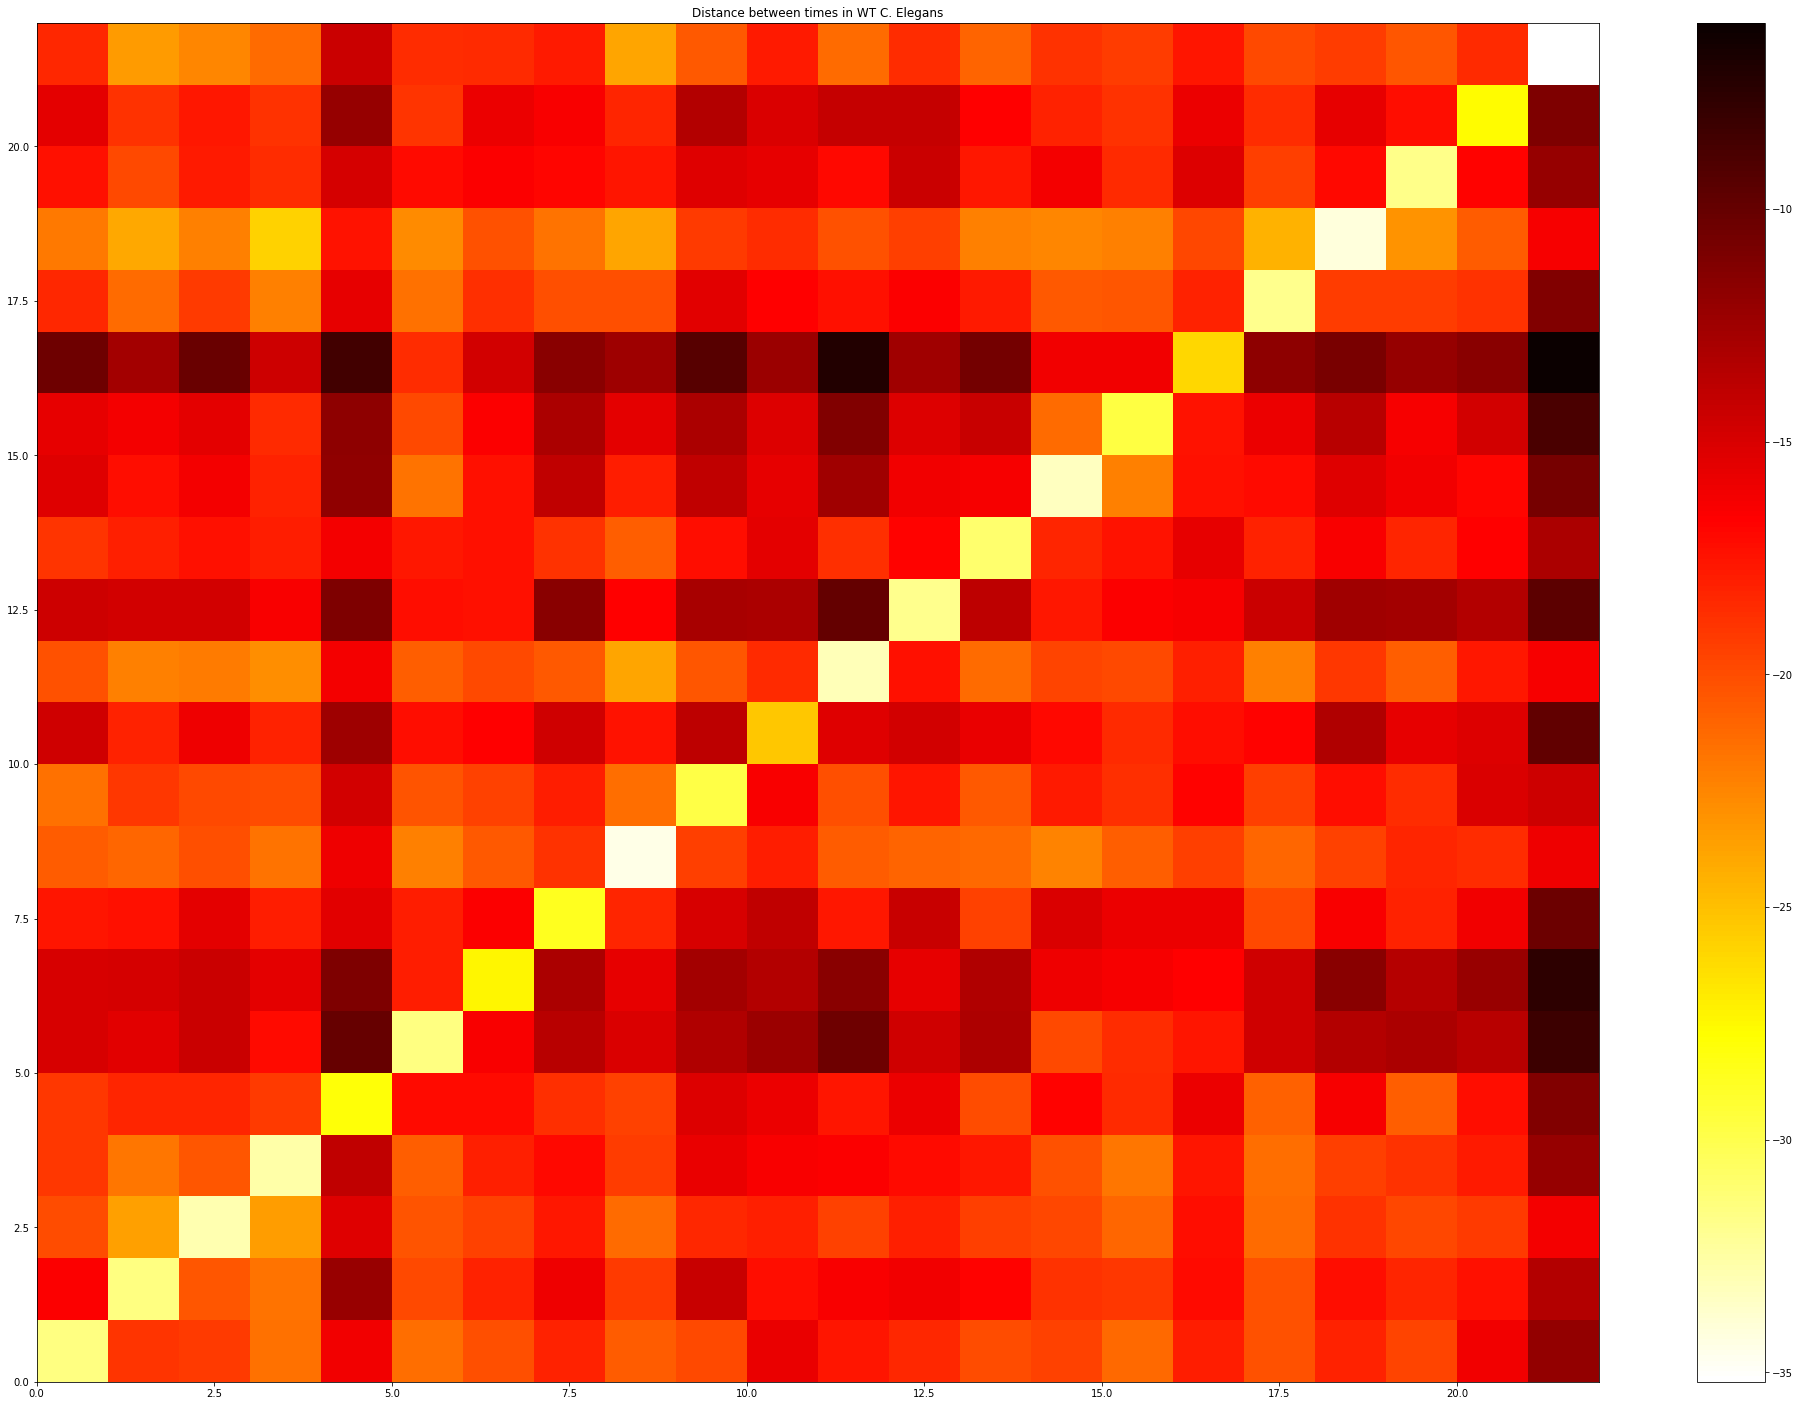

In [1052]:
plot_2_examples(['hot_r'],WT_subtree_mat[66:88,66:88]-WT_subtree_mat[66:88,44:66])

(array([15., 44., 59., 50., 23., 20., 10.,  6.,  3.,  1.]),
 array([ 9.8488578 , 11.41151986, 12.97418192, 14.53684398, 16.09950604,
        17.6621681 , 19.22483016, 20.78749222, 22.35015428, 23.91281635,
        25.47547841]),
 <BarContainer object of 10 artists>)

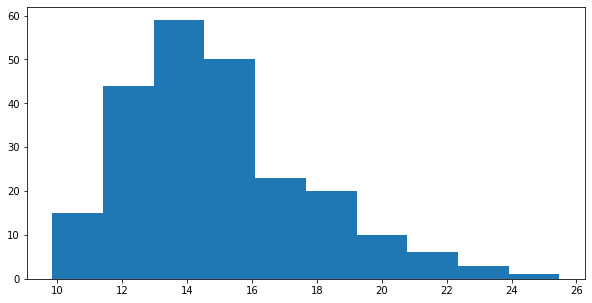

(array([ 7.,  8.,  5.,  4., 29., 60., 76., 42., 19.,  3.]),
 array([-35.29872519, -32.48124132, -29.66375746, -26.84627359,
        -24.02878973, -21.21130586, -18.393822  , -15.57633813,
        -12.75885427,  -9.9413704 ,  -7.12388654]),
 <BarContainer object of 10 artists>)

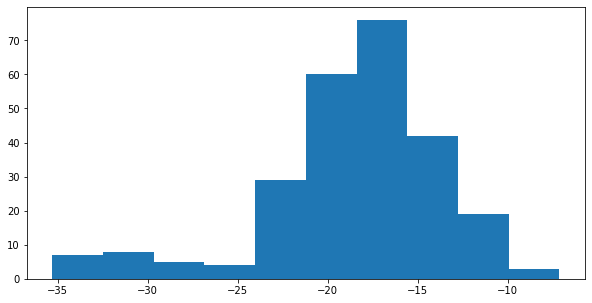

In [1053]:
plt.hist(self_comp(WT_subtree_mat[66:88,66:88]-WT_subtree_mat[66:88,44:66]))

(array([ 7.,  9.,  4.,  2., 24., 72., 81., 37., 13.,  4.]),
 array([-35.29872519, -32.37434509, -29.44996499, -26.52558489,
        -23.60120479, -20.67682469, -17.75244459, -14.82806449,
        -11.90368439,  -8.97930429,  -6.05492419]),
 <BarContainer object of 10 artists>)

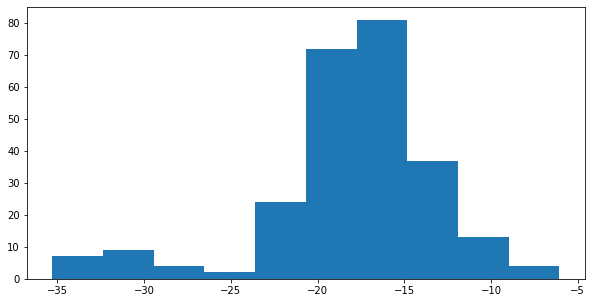

In [1055]:
plt.hist(self_comp(WT_subtree_mat[66:88,66:88]-WT_subtree_mat[66:88,44:66].T))